# 1. Install and Import Dependencies

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from GPUtil import showUtilization as gpu_usage

In [ ]:
!pip install opencv-python-headless<4.3

# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\PAVILION/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-2-12 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [4]:
img = 'https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg'


In [14]:
#results = model(img)
#results.print()
%cd yolov5
#!python 'yolov5/detect.py' --weights yolov5s.pt --img 640 --conf 0.25 --source 'data/images/zidane.jpg'


C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect\yolov5


In [6]:
os.getcwd()

'C:\\Users\\PAVILION\\AppData\\Local\\Programs\\Python\\Python37\\Drowsiness_detect'

In [20]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
!python "detect.py" --weights yolov5s.pt --img 640 --conf 0.25 --source "data/images/zidane.jpg"

detected object name is  tie
score is  tensor(0.52546, device='cuda:0')
detected object name is  person
score is  tensor(0.57235, device='cuda:0')
detected object name is  person
score is  tensor(0.87597, device='cuda:0')


detect: weights=['yolov5s.pt'], source=data/images/zidane.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-1-28 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect\yolov5\data\images\zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.020s)
Speed: 4.0ms pre-process, 20.1ms inference, 54.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


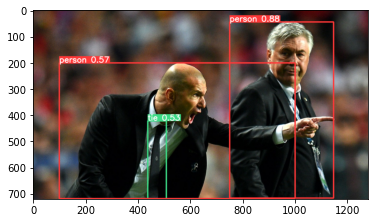

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

# 4. Real Time Detections

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [3]:
import uuid   # Unique identifier
import os
import time

In [4]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake','drowsy','happy','stressed']
number_imgs = 40

In [5]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.putText(frame, '{}'.format(img_num), (50,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2, cv2.LINE_AA)
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between capturesq
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [4]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data_alpha\images\A.ff5bf148-873a-11ec-ad71-5c879c719f9d.jpg


In [6]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.eb9dca8a-8cd1-11ec-8cc0-5c879c719f9a.jpg
data\images\awake.eb9dca8b-8cd1-11ec-8f1d-5c879c719f9a.jpg
data\images\awake.eb9df168-8cd1-11ec-b6bc-5c879c719f9a.jpg
data\images\awake.eb9df169-8cd1-11ec-9d5d-5c879c719f9a.jpg
data\images\awake.eb9df16a-8cd1-11ec-82a6-5c879c719f9a.jpg
data\images\awake.eb9df16b-8cd1-11ec-9782-5c879c719f9a.jpg
data\images\awake.eb9df16c-8cd1-11ec-b005-5c879c719f9a.jpg
data\images\awake.eb9df16d-8cd1-11ec-84f4-5c879c719f9a.jpg
data\images\awake.eb9df16e-8cd1-11ec-befe-5c879c719f9a.jpg
data\images\awake.eb9df16f-8cd1-11ec-9afd-5c879c719f9a.jpg
data\images\awake.eb9df170-8cd1-11ec-bbce-5c879c719f9a.jpg
data\images\awake.eb9df171-8cd1-11ec-b34a-5c879c719f9a.jpg
data\images\awake.eb9df172-8cd1-11ec-a507-5c879c719f9a.jpg
data\images\awake.eb9df173-8cd1-11ec-b41f-5c879c719f9a.jpg
data\images\awake.eb9df174-8cd1-11ec-bad3-5c879c719f9a.jpg
data\images\awake.eb9df175-8cd1-11ec-934d-5c879c719f9a.jpg
data\images\awake.eb9df176-8cd1-11ec-9a00-5c879c719f9a.j

In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade //streamlit
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [8]:
gpu_usage()
torch.cuda.empty_cache()
gpu_usage()


| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |
| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |


In [7]:
!cd yolov5 && python train.py --img 640 --batch 1 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 1
gpu_usage()

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
module 'signal' has no attribute 'SIGALRM'


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5  2022-1-28 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=

| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |


    exitcode = _main(fd)
  File "C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\lib\multiprocessing\spawn.py", line 114, in _main
    prepare(preparation_data)
  File "C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\lib\multiprocessing\spawn.py", line 225, in prepare
    _fixup_main_from_path(data['init_main_from_path'])
  File "C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\lib\multiprocessing\spawn.py", line 277, in _fixup_main_from_path
    run_name="__mp_main__")
  File "C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 263, in run_path
    pkg_name=pkg_name, script_name=fname)
  File "C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 96, in _run_module_code
    mod_name, mod_spec, pkg_name, script_name)
  File "C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drow

     1/499    0.476G   0.06876   0.02963   0.05777         0       640:  16%|#5        | 25/160 [00:05<00:29,  4.60it/s]
     1/499    0.476G   0.06876   0.02963   0.05777         0       640:  16%|#6        | 26/160 [00:05<00:27,  4.79it/s]
     1/499    0.476G   0.06794   0.02957   0.05723         1       640:  16%|#6        | 26/160 [00:05<00:27,  4.79it/s]
     1/499    0.476G   0.06794   0.02957   0.05723         1       640:  17%|#6        | 27/160 [00:05<00:27,  4.78it/s]
     1/499    0.476G   0.06797   0.02935   0.05702         1       640:  17%|#6        | 27/160 [00:05<00:27,  4.78it/s]
     1/499    0.476G   0.06797   0.02935   0.05702         1       640:  18%|#7        | 28/160 [00:05<00:28,  4.68it/s]
     1/499    0.476G   0.06725   0.02924   0.05671         1       640:  18%|#7        | 28/160 [00:06<00:28,  4.68it/s]
     1/499    0.476G   0.06725   0.02924   0.05671         1       640:  18%|#8        | 29/160 [00:06<00:28,  4.64it/s]
     1/499    0.476G    0.0678  

     1/499    0.476G   0.06804    0.0308   0.05735         1       640:  75%|#######5  | 120/160 [00:28<00:10,  3.95it/s]
     1/499    0.476G   0.06804    0.0308   0.05735         1       640:  76%|#######5  | 121/160 [00:28<00:09,  3.94it/s]
     1/499    0.476G   0.06748   0.03066   0.05688         0       640:  76%|#######5  | 121/160 [00:29<00:09,  3.94it/s]
     1/499    0.476G   0.06748   0.03066   0.05688         0       640:  76%|#######6  | 122/160 [00:29<00:09,  4.11it/s]
     1/499    0.476G   0.06757   0.03067   0.05694         2       640:  76%|#######6  | 122/160 [00:29<00:09,  4.11it/s]
     1/499    0.476G   0.06757   0.03067   0.05694         2       640:  77%|#######6  | 123/160 [00:29<00:09,  4.01it/s]
     1/499    0.476G    0.0677   0.03087     0.057         4       640:  77%|#######6  | 123/160 [00:29<00:09,  4.01it/s]
     1/499    0.476G    0.0677   0.03087     0.057         4       640:  78%|#######7  | 124/160 [00:29<00:09,  3.99it/s]
     1/499    0.476G   0

     2/499    0.476G   0.06942   0.02851   0.05089         4       640:  88%|########7 | 140/160 [00:37<00:05,  4.00it/s]
     2/499    0.476G   0.06942   0.02851   0.05089         4       640:  88%|########8 | 141/160 [00:37<00:05,  3.74it/s]
     2/499    0.476G    0.0695   0.02843   0.05079         2       640:  88%|########8 | 141/160 [00:38<00:05,  3.74it/s]
     2/499    0.476G    0.0695   0.02843   0.05079         2       640:  89%|########8 | 142/160 [00:38<00:04,  3.69it/s]
     2/499    0.476G   0.06956   0.02835   0.05077         1       640:  89%|########8 | 142/160 [00:38<00:04,  3.69it/s]
     2/499    0.476G   0.06956   0.02835   0.05077         1       640:  89%|########9 | 143/160 [00:38<00:04,  3.69it/s]
     2/499    0.476G   0.06969   0.02838   0.05084         3       640:  89%|########9 | 143/160 [00:38<00:04,  3.69it/s]
     2/499    0.476G   0.06969   0.02838   0.05084         3       640:  90%|######### | 144/160 [00:38<00:04,  3.62it/s]
     2/499    0.476G   0

     3/499    0.476G   0.07438   0.02229   0.04718         1       640:  18%|#7        | 28/160 [00:06<00:32,  4.01it/s]
     3/499    0.476G     0.075   0.02207   0.04715         1       640:  18%|#7        | 28/160 [00:07<00:32,  4.01it/s]
     3/499    0.476G     0.075   0.02207   0.04715         1       640:  18%|#8        | 29/160 [00:07<00:32,  4.01it/s]
     3/499    0.476G   0.07528   0.02193   0.04706         1       640:  18%|#8        | 29/160 [00:07<00:32,  4.01it/s]
     3/499    0.476G   0.07528   0.02193   0.04706         1       640:  19%|#8        | 30/160 [00:07<00:32,  4.02it/s]
     3/499    0.476G   0.07612   0.02248   0.04737         4       640:  19%|#8        | 30/160 [00:07<00:32,  4.02it/s]
     3/499    0.476G   0.07612   0.02248   0.04737         4       640:  19%|#9        | 31/160 [00:07<00:31,  4.13it/s]
     3/499    0.476G   0.07664   0.02263    0.0476         3       640:  19%|#9        | 31/160 [00:07<00:31,  4.13it/s]
     3/499    0.476G   0.07664  

     4/499    0.476G   0.07376   0.01795   0.04418         2       640:  90%|######### | 144/160 [00:34<00:03,  4.30it/s]
     4/499    0.476G   0.07376   0.01795   0.04418         2       640:  91%|######### | 145/160 [00:34<00:03,  4.14it/s]
     4/499    0.476G   0.07399   0.01799   0.04424         4       640:  91%|######### | 145/160 [00:34<00:03,  4.14it/s]
     4/499    0.476G   0.07399   0.01799   0.04424         4       640:  91%|#########1| 146/160 [00:34<00:03,  4.09it/s]
     4/499    0.476G   0.07406     0.018   0.04428         2       640:  91%|#########1| 146/160 [00:34<00:03,  4.09it/s]
     4/499    0.476G   0.07406     0.018   0.04428         2       640:  92%|#########1| 147/160 [00:34<00:03,  4.13it/s]
     4/499    0.476G   0.07423   0.01799   0.04434         2       640:  92%|#########1| 147/160 [00:35<00:03,  4.13it/s]
     4/499    0.476G   0.07423   0.01799   0.04434         2       640:  92%|#########2| 148/160 [00:35<00:02,  4.18it/s]
     4/499    0.476G   0

     5/499    0.476G   0.07694   0.01683   0.04429         1       640:  17%|#6        | 27/160 [00:06<00:32,  4.08it/s]
     5/499    0.476G   0.07694   0.01683   0.04429         1       640:  18%|#7        | 28/160 [00:06<00:32,  4.12it/s]
     5/499    0.476G   0.07774   0.01732   0.04451         4       640:  18%|#7        | 28/160 [00:06<00:32,  4.12it/s]
     5/499    0.476G   0.07774   0.01732   0.04451         4       640:  18%|#8        | 29/160 [00:06<00:31,  4.10it/s]
     5/499    0.476G   0.07849   0.01778   0.04469         4       640:  18%|#8        | 29/160 [00:07<00:31,  4.10it/s]
     5/499    0.476G   0.07849   0.01778   0.04469         4       640:  19%|#8        | 30/160 [00:07<00:31,  4.14it/s]
     5/499    0.476G   0.07793   0.01756   0.04442         1       640:  19%|#8        | 30/160 [00:07<00:31,  4.14it/s]
     5/499    0.476G   0.07793   0.01756   0.04442         1       640:  19%|#9        | 31/160 [00:07<00:30,  4.23it/s]
     5/499    0.476G   0.07816  

     6/499    0.476G   0.08879   0.01531   0.04481         2       640:  83%|########3 | 133/160 [00:32<00:06,  4.10it/s]
     6/499    0.476G   0.08879   0.01531   0.04481         2       640:  84%|########3 | 134/160 [00:32<00:06,  4.17it/s]
     6/499    0.476G   0.08891   0.01531   0.04489         2       640:  84%|########3 | 134/160 [00:32<00:06,  4.17it/s]
     6/499    0.476G   0.08891   0.01531   0.04489         2       640:  84%|########4 | 135/160 [00:32<00:06,  4.15it/s]
     6/499    0.476G   0.08883   0.01525   0.04483         1       640:  84%|########4 | 135/160 [00:32<00:06,  4.15it/s]
     6/499    0.476G   0.08883   0.01525   0.04483         1       640:  85%|########5 | 136/160 [00:32<00:05,  4.18it/s]
     6/499    0.476G   0.08863   0.01521   0.04477         1       640:  85%|########5 | 136/160 [00:33<00:05,  4.18it/s]
     6/499    0.476G   0.08863   0.01521   0.04477         1       640:  86%|########5 | 137/160 [00:33<00:05,  4.13it/s]
     6/499    0.476G   0

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  80%|########  | 64/80 [00:04<00:01, 14.97it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  82%|########2 | 66/80 [00:04<00:00, 14.76it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  85%|########5 | 68/80 [00:04<00:00, 14.84it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  88%|########7 | 70/80 [00:04<00:00, 14.90it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  90%|######### | 72/80 [00:04<00:00, 14.78it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  92%|#########2| 74/80 [00:04<00:00, 14.82it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  95%|#########5| 76/80 [00:05<00:00, 14.79it/s]
               Class     Images     Labels      

     7/499    0.476G   0.09657   0.01182   0.04379         1       640:  31%|###       | 49/160 [00:11<00:26,  4.21it/s]
     7/499    0.476G   0.09691   0.01185   0.04404         2       640:  31%|###       | 49/160 [00:12<00:26,  4.21it/s]
     7/499    0.476G   0.09691   0.01185   0.04404         2       640:  31%|###1      | 50/160 [00:12<00:26,  4.18it/s]
     7/499    0.476G   0.09733   0.01209   0.04413         4       640:  31%|###1      | 50/160 [00:12<00:26,  4.18it/s]
     7/499    0.476G   0.09733   0.01209   0.04413         4       640:  32%|###1      | 51/160 [00:12<00:26,  4.14it/s]
     7/499    0.476G   0.09691   0.01202   0.04391         1       640:  32%|###1      | 51/160 [00:12<00:26,  4.14it/s]
     7/499    0.476G   0.09691   0.01202   0.04391         1       640:  32%|###2      | 52/160 [00:12<00:25,  4.26it/s]
     7/499    0.476G   0.09687   0.01211   0.04406         2       640:  32%|###2      | 52/160 [00:12<00:25,  4.26it/s]
     7/499    0.476G   0.09687  

     8/499    0.476G   0.07528   0.01915   0.04427         1       640:  29%|##9       | 47/160 [00:11<00:26,  4.25it/s]
     8/499    0.476G   0.07552   0.01925   0.04446         2       640:  29%|##9       | 47/160 [00:11<00:26,  4.25it/s]
     8/499    0.476G   0.07552   0.01925   0.04446         2       640:  30%|###       | 48/160 [00:11<00:26,  4.23it/s]
     8/499    0.476G    0.0759   0.01973   0.04459         4       640:  30%|###       | 48/160 [00:11<00:26,  4.23it/s]
     8/499    0.476G    0.0759   0.01973   0.04459         4       640:  31%|###       | 49/160 [00:11<00:26,  4.17it/s]
     8/499    0.476G   0.07608   0.01955   0.04459         1       640:  31%|###       | 49/160 [00:12<00:26,  4.17it/s]
     8/499    0.476G   0.07608   0.01955   0.04459         1       640:  31%|###1      | 50/160 [00:12<00:26,  4.16it/s]
     8/499    0.476G   0.07589   0.01948   0.04459         1       640:  31%|###1      | 50/160 [00:12<00:26,  4.16it/s]
     8/499    0.476G   0.07589  

     8/499    0.476G   0.07498   0.02066   0.04603         1       640:  59%|#####8    | 94/160 [00:23<00:16,  4.09it/s]
     8/499    0.476G   0.07498   0.02066   0.04603         1       640:  59%|#####9    | 95/160 [00:23<00:15,  4.21it/s]
     8/499    0.476G   0.07471   0.02058   0.04591         1       640:  59%|#####9    | 95/160 [00:23<00:15,  4.21it/s]
     8/499    0.476G   0.07471   0.02058   0.04591         1       640:  60%|######    | 96/160 [00:23<00:15,  4.19it/s]
     8/499    0.476G   0.07468   0.02051   0.04587         1       640:  60%|######    | 96/160 [00:23<00:15,  4.19it/s]
     8/499    0.476G   0.07468   0.02051   0.04587         1       640:  61%|######    | 97/160 [00:23<00:15,  4.19it/s]
     8/499    0.476G   0.07486   0.02069     0.046         4       640:  61%|######    | 97/160 [00:23<00:15,  4.19it/s]
     8/499    0.476G   0.07486   0.02069     0.046         4       640:  61%|######1   | 98/160 [00:23<00:14,  4.16it/s]
     8/499    0.476G   0.07465  

     8/499    0.476G   0.07199   0.02082   0.04561         1       640:  86%|########6 | 138/160 [00:33<00:05,  4.14it/s]
     8/499    0.476G   0.07199   0.02082   0.04561         1       640:  87%|########6 | 139/160 [00:33<00:05,  4.05it/s]
     8/499    0.476G   0.07217   0.02094   0.04566         4       640:  87%|########6 | 139/160 [00:34<00:05,  4.05it/s]
     8/499    0.476G   0.07217   0.02094   0.04566         4       640:  88%|########7 | 140/160 [00:34<00:04,  4.02it/s]
     8/499    0.476G   0.07198    0.0209    0.0456         1       640:  88%|########7 | 140/160 [00:34<00:04,  4.02it/s]
     8/499    0.476G   0.07198    0.0209    0.0456         1       640:  88%|########8 | 141/160 [00:34<00:04,  4.08it/s]
     8/499    0.476G   0.07197   0.02084   0.04556         1       640:  88%|########8 | 141/160 [00:34<00:04,  4.08it/s]
     8/499    0.476G   0.07197   0.02084   0.04556         1       640:  89%|########8 | 142/160 [00:34<00:04,  4.12it/s]
     8/499    0.476G   0

     9/499    0.476G   0.07902   0.01395   0.04085         4       640:  36%|###6      | 58/160 [00:14<00:24,  4.19it/s]
     9/499    0.476G   0.07902   0.01395   0.04085         4       640:  37%|###6      | 59/160 [00:14<00:24,  4.15it/s]
     9/499    0.476G   0.07907   0.01392   0.04102         1       640:  37%|###6      | 59/160 [00:14<00:24,  4.15it/s]
     9/499    0.476G   0.07907   0.01392   0.04102         1       640:  38%|###7      | 60/160 [00:14<00:23,  4.24it/s]
     9/499    0.476G   0.07937   0.01426   0.04115         4       640:  38%|###7      | 60/160 [00:14<00:23,  4.24it/s]
     9/499    0.476G   0.07937   0.01426   0.04115         4       640:  38%|###8      | 61/160 [00:14<00:23,  4.29it/s]
     9/499    0.476G   0.07952    0.0142   0.04137         1       640:  38%|###8      | 61/160 [00:15<00:23,  4.29it/s]
     9/499    0.476G   0.07952    0.0142   0.04137         1       640:  39%|###8      | 62/160 [00:15<00:22,  4.33it/s]
     9/499    0.476G   0.07954  

     9/499    0.476G   0.07682   0.01555   0.04085         1       640:  79%|#######9  | 127/160 [00:31<00:11,  2.94it/s]
     9/499    0.476G   0.07691   0.01559   0.04092         2       640:  79%|#######9  | 127/160 [00:31<00:11,  2.94it/s]
     9/499    0.476G   0.07691   0.01559   0.04092         2       640:  80%|########  | 128/160 [00:31<00:10,  2.97it/s]
     9/499    0.476G   0.07706   0.01564   0.04098         3       640:  80%|########  | 128/160 [00:32<00:10,  2.97it/s]
     9/499    0.476G   0.07706   0.01564   0.04098         3       640:  81%|########  | 129/160 [00:32<00:09,  3.11it/s]
     9/499    0.476G   0.07723   0.01573   0.04108         4       640:  81%|########  | 129/160 [00:32<00:09,  3.11it/s]
     9/499    0.476G   0.07723   0.01573   0.04108         4       640:  81%|########1 | 130/160 [00:32<00:09,  3.11it/s]
     9/499    0.476G   0.07736   0.01571   0.04108         2       640:  81%|########1 | 130/160 [00:32<00:09,  3.11it/s]
     9/499    0.476G   0

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 40/80 [00:03<00:03, 12.25it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  52%|#####2    | 42/80 [00:03<00:03, 12.19it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  55%|#####5    | 44/80 [00:03<00:03, 11.76it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  57%|#####7    | 46/80 [00:03<00:02, 11.97it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  60%|######    | 48/80 [00:03<00:02, 11.85it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  62%|######2   | 50/80 [00:04<00:02, 12.10it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  65%|######5   | 52/80 [00:04<00:02, 12.42it/s]
               Class     Images     Labels      

    11/499    0.476G   0.07678   0.01797   0.04274         1       640:  44%|####4     | 71/160 [00:17<00:22,  3.96it/s]
    11/499    0.476G   0.07673   0.01791   0.04279         1       640:  44%|####4     | 71/160 [00:17<00:22,  3.96it/s]
    11/499    0.476G   0.07673   0.01791   0.04279         1       640:  45%|####5     | 72/160 [00:17<00:21,  4.02it/s]
    11/499    0.476G   0.07666   0.01785   0.04282         1       640:  45%|####5     | 72/160 [00:18<00:21,  4.02it/s]
    11/499    0.476G   0.07666   0.01785   0.04282         1       640:  46%|####5     | 73/160 [00:18<00:21,  3.97it/s]
    11/499    0.476G   0.07656   0.01797   0.04291         2       640:  46%|####5     | 73/160 [00:18<00:21,  3.97it/s]
    11/499    0.476G   0.07656   0.01797   0.04291         2       640:  46%|####6     | 74/160 [00:18<00:21,  4.01it/s]
    11/499    0.476G   0.07666   0.01809   0.04305         2       640:  46%|####6     | 74/160 [00:18<00:21,  4.01it/s]
    11/499    0.476G   0.07666  

    11/499    0.476G   0.07176   0.01745   0.04162         4       640:  95%|#########5| 152/160 [00:37<00:01,  4.13it/s]
    11/499    0.476G   0.07176   0.01745   0.04162         4       640:  96%|#########5| 153/160 [00:37<00:01,  4.08it/s]
    11/499    0.476G   0.07183    0.0176   0.04165         4       640:  96%|#########5| 153/160 [00:37<00:01,  4.08it/s]
    11/499    0.476G   0.07183    0.0176   0.04165         4       640:  96%|#########6| 154/160 [00:37<00:01,  4.09it/s]
    11/499    0.476G   0.07171   0.01757    0.0416         1       640:  96%|#########6| 154/160 [00:38<00:01,  4.09it/s]
    11/499    0.476G   0.07171   0.01757    0.0416         1       640:  97%|#########6| 155/160 [00:38<00:01,  4.11it/s]
    11/499    0.476G   0.07176   0.01758   0.04163         2       640:  97%|#########6| 155/160 [00:38<00:01,  4.11it/s]
    11/499    0.476G   0.07176   0.01758   0.04163         2       640:  98%|#########7| 156/160 [00:38<00:00,  4.13it/s]
    11/499    0.476G   0

    12/499    0.476G   0.04733   0.01553   0.03119         1       640:   4%|4         | 7/160 [00:01<00:38,  4.02it/s]
    12/499    0.476G   0.04761   0.01523   0.03166         1       640:   4%|4         | 7/160 [00:01<00:38,  4.02it/s]
    12/499    0.476G   0.04761   0.01523   0.03166         1       640:   5%|5         | 8/160 [00:01<00:38,  3.95it/s]
    12/499    0.476G   0.05224   0.01757   0.03333         4       640:   5%|5         | 8/160 [00:02<00:38,  3.95it/s]
    12/499    0.476G   0.05224   0.01757   0.03333         4       640:   6%|5         | 9/160 [00:02<00:41,  3.67it/s]
    12/499    0.476G   0.05653    0.0172   0.03471         2       640:   6%|5         | 9/160 [00:02<00:41,  3.67it/s]
    12/499    0.476G   0.05653    0.0172   0.03471         2       640:   6%|6         | 10/160 [00:02<00:41,  3.61it/s]
    12/499    0.476G    0.0596   0.01932   0.03607         4       640:   6%|6         | 10/160 [00:02<00:41,  3.61it/s]
    12/499    0.476G    0.0596   0.019

    13/499    0.476G   0.07117   0.01642   0.04151         1       640:  84%|########3 | 134/160 [00:33<00:06,  3.99it/s]
    13/499    0.476G   0.07102   0.01638   0.04144         1       640:  84%|########3 | 134/160 [00:33<00:06,  3.99it/s]
    13/499    0.476G   0.07102   0.01638   0.04144         1       640:  84%|########4 | 135/160 [00:33<00:06,  4.09it/s]
    13/499    0.476G   0.07103   0.01635   0.04149         1       640:  84%|########4 | 135/160 [00:33<00:06,  4.09it/s]
    13/499    0.476G   0.07103   0.01635   0.04149         1       640:  85%|########5 | 136/160 [00:33<00:05,  4.09it/s]
    13/499    0.476G   0.07119   0.01646   0.04153         4       640:  85%|########5 | 136/160 [00:33<00:05,  4.09it/s]
    13/499    0.476G   0.07119   0.01646   0.04153         4       640:  86%|########5 | 137/160 [00:33<00:05,  4.10it/s]
    13/499    0.476G   0.07067   0.01636   0.04123         0       640:  86%|########5 | 137/160 [00:34<00:05,  4.10it/s]
    13/499    0.476G   0

    14/499    0.476G   0.07057   0.01512    0.0415         1       640:   6%|5         | 9/160 [00:02<00:36,  4.09it/s]
    14/499    0.476G   0.07057   0.01512    0.0415         1       640:   6%|6         | 10/160 [00:02<00:36,  4.08it/s]
    14/499    0.476G      0.07   0.01505   0.04207         1       640:   6%|6         | 10/160 [00:02<00:36,  4.08it/s]
    14/499    0.476G      0.07   0.01505   0.04207         1       640:   7%|6         | 11/160 [00:02<00:36,  4.10it/s]
    14/499    0.476G   0.07224   0.01512   0.04224         2       640:   7%|6         | 11/160 [00:02<00:36,  4.10it/s]
    14/499    0.476G   0.07224   0.01512   0.04224         2       640:   8%|7         | 12/160 [00:02<00:38,  3.87it/s]
    14/499    0.476G   0.07073   0.01488   0.04148         1       640:   8%|7         | 12/160 [00:03<00:38,  3.87it/s]
    14/499    0.476G   0.07073   0.01488   0.04148         1       640:   8%|8         | 13/160 [00:03<00:38,  3.80it/s]
    14/499    0.476G    0.0722   

    14/499    0.476G   0.06941   0.01599   0.03998         0       640:  51%|#####1    | 82/160 [00:20<00:18,  4.21it/s]
    14/499    0.476G   0.06916   0.01597   0.03989         1       640:  51%|#####1    | 82/160 [00:20<00:18,  4.21it/s]
    14/499    0.476G   0.06916   0.01597   0.03989         1       640:  52%|#####1    | 83/160 [00:20<00:18,  4.19it/s]
    14/499    0.476G   0.06834    0.0158   0.03942         0       640:  52%|#####1    | 83/160 [00:20<00:18,  4.19it/s]
    14/499    0.476G   0.06834    0.0158   0.03942         0       640:  52%|#####2    | 84/160 [00:20<00:17,  4.33it/s]
    14/499    0.476G   0.06817   0.01573   0.03933         1       640:  52%|#####2    | 84/160 [00:20<00:17,  4.33it/s]
    14/499    0.476G   0.06817   0.01573   0.03933         1       640:  53%|#####3    | 85/160 [00:20<00:17,  4.24it/s]
    14/499    0.476G   0.06824   0.01584   0.03934         2       640:  53%|#####3    | 85/160 [00:21<00:17,  4.24it/s]
    14/499    0.476G   0.06824  

    15/499    0.476G   0.06084   0.01758   0.03979         2       640:  99%|#########9| 159/160 [00:39<00:00,  4.05it/s]
    15/499    0.476G   0.06079   0.01756   0.03983         1       640:  99%|#########9| 159/160 [00:39<00:00,  4.05it/s]
    15/499    0.476G   0.06079   0.01756   0.03983         1       640: 100%|##########| 160/160 [00:39<00:00,  4.05it/s]
    15/499    0.476G   0.06079   0.01756   0.03983         1       640: 100%|##########| 160/160 [00:39<00:00,  4.07it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/80 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   2%|2         | 2/80 [00:00<00:05, 13.79it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   5%|5         | 4/80 [00:00<00:05, 13.63it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   8%|7         | 6/80 [00:

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  70%|#######   | 56/80 [00:03<00:01, 14.95it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  72%|#######2  | 58/80 [00:03<00:01, 14.98it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 60/80 [00:04<00:01, 14.96it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  78%|#######7  | 62/80 [00:04<00:01, 15.09it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  80%|########  | 64/80 [00:04<00:01, 15.21it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  82%|########2 | 66/80 [00:04<00:00, 15.09it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  85%|########5 | 68/80 [00:04<00:00, 14.84it/s]
               Class     Images     Labels      

    17/499    0.476G   0.06394   0.01305   0.03858         1       640:  68%|######7   | 108/160 [00:26<00:12,  4.05it/s]
    17/499    0.476G   0.06394   0.01305   0.03858         1       640:  68%|######8   | 109/160 [00:26<00:12,  4.01it/s]
    17/499    0.476G   0.06422   0.01308   0.03862         4       640:  68%|######8   | 109/160 [00:27<00:12,  4.01it/s]
    17/499    0.476G   0.06422   0.01308   0.03862         4       640:  69%|######8   | 110/160 [00:27<00:12,  3.97it/s]
    17/499    0.476G   0.06399   0.01308    0.0386         1       640:  69%|######8   | 110/160 [00:27<00:12,  3.97it/s]
    17/499    0.476G   0.06399   0.01308    0.0386         1       640:  69%|######9   | 111/160 [00:27<00:12,  4.03it/s]
    17/499    0.476G   0.06378   0.01309   0.03852         1       640:  69%|######9   | 111/160 [00:27<00:12,  4.03it/s]
    17/499    0.476G   0.06378   0.01309   0.03852         1       640:  70%|#######   | 112/160 [00:27<00:11,  4.06it/s]
    17/499    0.476G   0

    18/499    0.476G   0.05569   0.01414   0.03941         1       640:  80%|########  | 128/160 [00:32<00:07,  4.12it/s]
    18/499    0.476G   0.05551   0.01413   0.03936         1       640:  80%|########  | 128/160 [00:33<00:07,  4.12it/s]
    18/499    0.476G   0.05551   0.01413   0.03936         1       640:  81%|########  | 129/160 [00:33<00:07,  4.21it/s]
    18/499    0.476G   0.05566   0.01422   0.03941         4       640:  81%|########  | 129/160 [00:33<00:07,  4.21it/s]
    18/499    0.476G   0.05566   0.01422   0.03941         4       640:  81%|########1 | 130/160 [00:33<00:07,  4.07it/s]
    18/499    0.476G   0.05545   0.01422   0.03934         1       640:  81%|########1 | 130/160 [00:33<00:07,  4.07it/s]
    18/499    0.476G   0.05545   0.01422   0.03934         1       640:  82%|########1 | 131/160 [00:33<00:07,  3.96it/s]
    18/499    0.476G   0.05564   0.01431   0.03939         4       640:  82%|########1 | 131/160 [00:34<00:07,  3.96it/s]
    18/499    0.476G   0

    19/499    0.476G    0.0578   0.01494   0.04085         1       640:  48%|####7     | 76/160 [00:19<00:20,  4.08it/s]
    19/499    0.476G    0.0578   0.01494   0.04085         1       640:  48%|####8     | 77/160 [00:19<00:20,  4.08it/s]
    19/499    0.476G   0.05814   0.01501   0.04091         4       640:  48%|####8     | 77/160 [00:19<00:20,  4.08it/s]
    19/499    0.476G   0.05814   0.01501   0.04091         4       640:  49%|####8     | 78/160 [00:19<00:20,  3.98it/s]
    19/499    0.476G   0.05834   0.01517   0.04096         4       640:  49%|####8     | 78/160 [00:19<00:20,  3.98it/s]
    19/499    0.476G   0.05834   0.01517   0.04096         4       640:  49%|####9     | 79/160 [00:19<00:20,  4.04it/s]
    19/499    0.476G   0.05762     0.015   0.04045         0       640:  49%|####9     | 79/160 [00:19<00:20,  4.04it/s]
    19/499    0.476G   0.05762     0.015   0.04045         0       640:  50%|#####     | 80/160 [00:19<00:18,  4.22it/s]
    19/499    0.476G   0.05729  

    20/499    0.476G    0.0482   0.01318   0.03786         1       640:  57%|#####6    | 91/160 [00:23<00:16,  4.10it/s]
    20/499    0.476G    0.0482   0.01318   0.03786         1       640:  57%|#####7    | 92/160 [00:23<00:16,  4.04it/s]
    20/499    0.476G   0.04768   0.01305   0.03745         0       640:  57%|#####7    | 92/160 [00:23<00:16,  4.04it/s]
    20/499    0.476G   0.04768   0.01305   0.03745         0       640:  58%|#####8    | 93/160 [00:23<00:16,  4.14it/s]
    20/499    0.476G   0.04801   0.01312   0.03756         4       640:  58%|#####8    | 93/160 [00:23<00:16,  4.14it/s]
    20/499    0.476G   0.04801   0.01312   0.03756         4       640:  59%|#####8    | 94/160 [00:23<00:16,  4.09it/s]
    20/499    0.476G   0.04784   0.01307   0.03747         1       640:  59%|#####8    | 94/160 [00:24<00:16,  4.09it/s]
    20/499    0.476G   0.04784   0.01307   0.03747         1       640:  59%|#####9    | 95/160 [00:24<00:15,  4.11it/s]
    20/499    0.476G    0.0482  

    21/499    0.476G   0.04962    0.0099   0.03222         3       640:  11%|#         | 17/160 [00:04<00:34,  4.17it/s]
    21/499    0.476G   0.05155   0.01029   0.03312         3       640:  11%|#         | 17/160 [00:04<00:34,  4.17it/s]
    21/499    0.476G   0.05155   0.01029   0.03312         3       640:  11%|#1        | 18/160 [00:04<00:34,  4.13it/s]
    21/499    0.476G   0.05298   0.01012   0.03349         1       640:  11%|#1        | 18/160 [00:04<00:34,  4.13it/s]
    21/499    0.476G   0.05298   0.01012   0.03349         1       640:  12%|#1        | 19/160 [00:04<00:34,  4.10it/s]
    21/499    0.476G   0.05224   0.01004   0.03349         1       640:  12%|#1        | 19/160 [00:04<00:34,  4.10it/s]
    21/499    0.476G   0.05224   0.01004   0.03349         1       640:  12%|#2        | 20/160 [00:04<00:34,  4.10it/s]
    21/499    0.476G   0.05162   0.01033   0.03335         2       640:  12%|#2        | 20/160 [00:05<00:34,  4.10it/s]
    21/499    0.476G   0.05162  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/80 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   2%|2         | 2/80 [00:00<00:05, 14.81it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   5%|5         | 4/80 [00:00<00:04, 15.63it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   8%|7         | 6/80 [00:00<00:04, 15.80it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  10%|#         | 8/80 [00:00<00:04, 16.13it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  12%|#2        | 10/80 [00:00<00:04, 15.50it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  15%|#5        | 12/80 [00:00<00:04, 15.18it/s]
               Class     Images     Labels          P        

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/160 [00:00<?, ?it/s]
    24/499    0.476G   0.03875  0.007104   0.03208         1       640:   0%|          | 0/160 [00:00<?, ?it/s]
    24/499    0.476G   0.03875  0.007104   0.03208         1       640:   1%|          | 1/160 [00:00<00:41,  3.86it/s]
    24/499    0.476G   0.01937    0.0039   0.01604         0       640:   1%|          | 1/160 [00:00<00:41,  3.86it/s]
    24/499    0.476G   0.01937    0.0039   0.01604         0       640:   1%|1         | 2/160 [00:00<00:37,  4.25it/s]
    24/499    0.476G   0.03228  0.004715   0.02089         1       640:   1%|1         | 2/160 [00:00<00:37,  4.25it/s]
    24/499    0.476G   0.03228  0.004715   0.02089         1       640:   2%|1         | 3/160 [00:00<00:37,  4.17it/s]
    24/499    0.476G   0.04057   0.00493   0.02594         1       640:   2%|1         | 3/160 [00:00<00:37,  4.17it/s]
    24/499    0.476G   0.04057   0.00493   0.02594      

    25/499    0.476G   0.04983   0.01122   0.04055         4       640:  40%|####      | 64/160 [00:16<00:24,  3.94it/s]
    25/499    0.476G   0.04983   0.01122   0.04055         4       640:  41%|####      | 65/160 [00:16<00:24,  3.90it/s]
    25/499    0.476G   0.04907   0.01106   0.03994         0       640:  41%|####      | 65/160 [00:16<00:24,  3.90it/s]
    25/499    0.476G   0.04907   0.01106   0.03994         0       640:  41%|####1     | 66/160 [00:16<00:22,  4.09it/s]
    25/499    0.476G   0.04932   0.01119   0.03999         4       640:  41%|####1     | 66/160 [00:16<00:22,  4.09it/s]
    25/499    0.476G   0.04932   0.01119   0.03999         4       640:  42%|####1     | 67/160 [00:16<00:22,  4.14it/s]
    25/499    0.476G   0.04981   0.01135      0.04         4       640:  42%|####1     | 67/160 [00:16<00:22,  4.14it/s]
    25/499    0.476G   0.04981   0.01135      0.04         4       640:  42%|####2     | 68/160 [00:16<00:22,  4.06it/s]
    25/499    0.476G   0.04985  

    25/499    0.476G   0.04932   0.01085   0.03951         1       640:  87%|########6 | 139/160 [00:34<00:05,  4.00it/s]
    25/499    0.476G    0.0494   0.01086   0.03957         1       640:  87%|########6 | 139/160 [00:34<00:05,  4.00it/s]
    25/499    0.476G    0.0494   0.01086   0.03957         1       640:  88%|########7 | 140/160 [00:34<00:05,  3.97it/s]
    25/499    0.476G   0.04948   0.01091   0.03959         4       640:  88%|########7 | 140/160 [00:35<00:05,  3.97it/s]
    25/499    0.476G   0.04948   0.01091   0.03959         4       640:  88%|########8 | 141/160 [00:35<00:04,  4.03it/s]
    25/499    0.476G    0.0496   0.01096   0.03964         3       640:  88%|########8 | 141/160 [00:35<00:04,  4.03it/s]
    25/499    0.476G    0.0496   0.01096   0.03964         3       640:  89%|########8 | 142/160 [00:35<00:04,  4.00it/s]
    25/499    0.476G   0.04963   0.01092   0.03968         1       640:  89%|########8 | 142/160 [00:35<00:04,  4.00it/s]
    25/499    0.476G   0

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  10%|#         | 8/80 [00:00<00:04, 14.55it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  12%|#2        | 10/80 [00:00<00:04, 14.45it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  15%|#5        | 12/80 [00:00<00:04, 14.40it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  18%|#7        | 14/80 [00:00<00:04, 14.36it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  20%|##        | 16/80 [00:01<00:04, 13.92it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  22%|##2       | 18/80 [00:01<00:04, 14.00it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  25%|##5       | 20/80 [00:01<00:04, 14.12it/s]
               Class     Images     Labels       

    27/499    0.476G   0.04629  0.009915   0.03655         1       640:  41%|####1     | 66/160 [00:16<00:23,  4.07it/s]
    27/499    0.476G   0.04629  0.009915   0.03655         1       640:  42%|####1     | 67/160 [00:16<00:23,  4.03it/s]
    27/499    0.476G   0.04588   0.00986   0.03643         1       640:  42%|####1     | 67/160 [00:16<00:23,  4.03it/s]
    27/499    0.476G   0.04588   0.00986   0.03643         1       640:  42%|####2     | 68/160 [00:16<00:22,  4.08it/s]
    27/499    0.476G   0.04551  0.009798   0.03634         1       640:  42%|####2     | 68/160 [00:17<00:22,  4.08it/s]
    27/499    0.476G   0.04551  0.009798   0.03634         1       640:  43%|####3     | 69/160 [00:17<00:22,  4.09it/s]
    27/499    0.476G   0.04554  0.009732   0.03641         1       640:  43%|####3     | 69/160 [00:17<00:22,  4.09it/s]
    27/499    0.476G   0.04554  0.009732   0.03641         1       640:  44%|####3     | 70/160 [00:17<00:22,  4.08it/s]
    27/499    0.476G    0.0457  

    28/499    0.476G   0.04211   0.01003   0.03478         4       640:  79%|#######9  | 127/160 [00:31<00:07,  4.18it/s]
    28/499    0.476G   0.04211   0.01003   0.03478         4       640:  80%|########  | 128/160 [00:31<00:07,  4.07it/s]
    28/499    0.476G     0.042      0.01   0.03474         1       640:  80%|########  | 128/160 [00:32<00:07,  4.07it/s]
    28/499    0.476G     0.042      0.01   0.03474         1       640:  81%|########  | 129/160 [00:32<00:07,  4.06it/s]
    28/499    0.476G   0.04217  0.009966   0.03481         1       640:  81%|########  | 129/160 [00:32<00:07,  4.06it/s]
    28/499    0.476G   0.04217  0.009966   0.03481         1       640:  81%|########1 | 130/160 [00:32<00:07,  4.04it/s]
    28/499    0.476G   0.04234  0.009981   0.03488         3       640:  81%|########1 | 130/160 [00:32<00:07,  4.04it/s]
    28/499    0.476G   0.04234  0.009981   0.03488         3       640:  82%|########1 | 131/160 [00:32<00:07,  3.97it/s]
    28/499    0.476G   0

    29/499    0.476G   0.04644  0.009009     0.037         4       640:  42%|####1     | 67/160 [00:16<00:23,  3.94it/s]
    29/499    0.476G   0.04651  0.009023   0.03713         2       640:  42%|####1     | 67/160 [00:17<00:23,  3.94it/s]
    29/499    0.476G   0.04651  0.009023   0.03713         2       640:  42%|####2     | 68/160 [00:17<00:23,  3.85it/s]
    29/499    0.476G   0.04661  0.009043   0.03723         2       640:  42%|####2     | 68/160 [00:17<00:23,  3.85it/s]
    29/499    0.476G   0.04661  0.009043   0.03723         2       640:  43%|####3     | 69/160 [00:17<00:23,  3.85it/s]
    29/499    0.476G   0.04673   0.00922   0.03729         4       640:  43%|####3     | 69/160 [00:17<00:23,  3.85it/s]
    29/499    0.476G   0.04673   0.00922   0.03729         4       640:  44%|####3     | 70/160 [00:17<00:23,  3.89it/s]
    29/499    0.476G   0.04679  0.009179   0.03724         1       640:  44%|####3     | 70/160 [00:17<00:23,  3.89it/s]
    29/499    0.476G   0.04679  

    30/499    0.476G   0.04052  0.009055   0.03613         2       640:  98%|#########8| 157/160 [00:38<00:00,  4.05it/s]
    30/499    0.476G   0.04058  0.009235   0.03609         3       640:  98%|#########8| 157/160 [00:39<00:00,  4.05it/s]
    30/499    0.476G   0.04058  0.009235   0.03609         3       640:  99%|#########8| 158/160 [00:39<00:00,  4.02it/s]
    30/499    0.476G   0.04052  0.009216   0.03603         1       640:  99%|#########8| 158/160 [00:39<00:00,  4.02it/s]
    30/499    0.476G   0.04052  0.009216   0.03603         1       640:  99%|#########9| 159/160 [00:39<00:00,  4.18it/s]
    30/499    0.476G    0.0405  0.009204    0.0361         1       640:  99%|#########9| 159/160 [00:39<00:00,  4.18it/s]
    30/499    0.476G    0.0405  0.009204    0.0361         1       640: 100%|##########| 160/160 [00:39<00:00,  4.18it/s]
    30/499    0.476G    0.0405  0.009204    0.0361         1       640: 100%|##########| 160/160 [00:39<00:00,  4.04it/s]

               Class   

    31/499    0.476G    0.0403  0.009353   0.03501         2       640:   6%|6         | 10/160 [00:02<00:35,  4.19it/s]
    31/499    0.476G   0.03918  0.009396   0.03464         2       640:   6%|6         | 10/160 [00:02<00:35,  4.19it/s]
    31/499    0.476G   0.03918  0.009396   0.03464         2       640:   7%|6         | 11/160 [00:02<00:36,  4.14it/s]
    31/499    0.476G   0.04137  0.009061   0.03518         1       640:   7%|6         | 11/160 [00:02<00:36,  4.14it/s]
    31/499    0.476G   0.04137  0.009061   0.03518         1       640:   8%|7         | 12/160 [00:02<00:35,  4.15it/s]
    31/499    0.476G   0.04052  0.008821   0.03484         1       640:   8%|7         | 12/160 [00:03<00:35,  4.15it/s]
    31/499    0.476G   0.04052  0.008821   0.03484         1       640:   8%|8         | 13/160 [00:03<00:34,  4.21it/s]
    31/499    0.476G   0.03763  0.008218   0.03235         0       640:   8%|8         | 13/160 [00:03<00:34,  4.21it/s]
    31/499    0.476G   0.03763  

    32/499    0.476G   0.04349  0.009483   0.03765         1       640:  98%|#########8| 157/160 [00:38<00:00,  4.04it/s]
    32/499    0.476G   0.04345  0.009455   0.03766         1       640:  98%|#########8| 157/160 [00:38<00:00,  4.04it/s]
    32/499    0.476G   0.04345  0.009455   0.03766         1       640:  99%|#########8| 158/160 [00:38<00:00,  4.00it/s]
    32/499    0.476G   0.04346  0.009462   0.03769         2       640:  99%|#########8| 158/160 [00:39<00:00,  4.00it/s]
    32/499    0.476G   0.04346  0.009462   0.03769         2       640:  99%|#########9| 159/160 [00:39<00:00,  3.97it/s]
    32/499    0.476G   0.04367  0.009506   0.03767         2       640:  99%|#########9| 159/160 [00:39<00:00,  3.97it/s]
    32/499    0.476G   0.04367  0.009506   0.03767         2       640: 100%|##########| 160/160 [00:39<00:00,  3.98it/s]
    32/499    0.476G   0.04367  0.009506   0.03767         2       640: 100%|##########| 160/160 [00:39<00:00,  4.05it/s]

               Class   

    33/499    0.476G   0.03893  0.008936   0.03548         4       640:  30%|###       | 48/160 [00:12<00:28,  3.89it/s]
    33/499    0.476G   0.03889  0.008891   0.03571         1       640:  30%|###       | 48/160 [00:12<00:28,  3.89it/s]
    33/499    0.476G   0.03889  0.008891   0.03571         1       640:  31%|###       | 49/160 [00:12<00:28,  3.87it/s]
    33/499    0.476G   0.03906  0.008911   0.03592         2       640:  31%|###       | 49/160 [00:12<00:28,  3.87it/s]
    33/499    0.476G   0.03906  0.008911   0.03592         2       640:  31%|###1      | 50/160 [00:12<00:28,  3.88it/s]
    33/499    0.476G   0.03942  0.009071   0.03615         4       640:  31%|###1      | 50/160 [00:12<00:28,  3.88it/s]
    33/499    0.476G   0.03942  0.009071   0.03615         4       640:  32%|###1      | 51/160 [00:12<00:27,  3.93it/s]
    33/499    0.476G    0.0391  0.009023   0.03603         1       640:  32%|###1      | 51/160 [00:13<00:27,  3.93it/s]
    33/499    0.476G    0.0391  

    33/499    0.476G   0.03983  0.008766   0.03651         1       640:  98%|#########8| 157/160 [00:39<00:00,  3.98it/s]
    33/499    0.476G   0.03983  0.008766   0.03651         1       640:  99%|#########8| 158/160 [00:39<00:00,  3.98it/s]
    33/499    0.476G   0.04001  0.008833   0.03656         4       640:  99%|#########8| 158/160 [00:39<00:00,  3.98it/s]
    33/499    0.476G   0.04001  0.008833   0.03656         4       640:  99%|#########9| 159/160 [00:39<00:00,  3.96it/s]
    33/499    0.476G   0.03992  0.008816   0.03648         1       640:  99%|#########9| 159/160 [00:39<00:00,  3.96it/s]
    33/499    0.476G   0.03992  0.008816   0.03648         1       640: 100%|##########| 160/160 [00:39<00:00,  4.00it/s]
    33/499    0.476G   0.03992  0.008816   0.03648         1       640: 100%|##########| 160/160 [00:39<00:00,  4.03it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/80 [00:00<?, ?it/s]
               Cla

    34/499    0.476G   0.04667  0.007125   0.03175         1       640:   4%|4         | 7/160 [00:01<00:37,  4.05it/s]
    34/499    0.476G   0.04622  0.007141   0.03255         1       640:   4%|4         | 7/160 [00:01<00:37,  4.05it/s]
    34/499    0.476G   0.04622  0.007141   0.03255         1       640:   5%|5         | 8/160 [00:01<00:37,  4.00it/s]
    34/499    0.476G   0.04441  0.006834   0.03236         1       640:   5%|5         | 8/160 [00:02<00:37,  4.00it/s]
    34/499    0.476G   0.04441  0.006834   0.03236         1       640:   6%|5         | 9/160 [00:02<00:37,  4.00it/s]
    34/499    0.476G   0.04681  0.007889   0.03308         4       640:   6%|5         | 9/160 [00:02<00:37,  4.00it/s]
    34/499    0.476G   0.04681  0.007889   0.03308         4       640:   6%|6         | 10/160 [00:02<00:38,  3.94it/s]
    34/499    0.476G   0.04478  0.007776    0.0333         1       640:   6%|6         | 10/160 [00:02<00:38,  3.94it/s]
    34/499    0.476G   0.04478  0.0077

    36/499    0.476G   0.05242  0.008925   0.03675         1       640:  40%|####      | 64/160 [00:15<00:23,  4.02it/s]
    36/499    0.476G   0.05213  0.008876   0.03659         1       640:  40%|####      | 64/160 [00:16<00:23,  4.02it/s]
    36/499    0.476G   0.05213  0.008876   0.03659         1       640:  41%|####      | 65/160 [00:16<00:23,  4.08it/s]
    36/499    0.476G   0.05179  0.008823   0.03642         1       640:  41%|####      | 65/160 [00:16<00:23,  4.08it/s]
    36/499    0.476G   0.05179  0.008823   0.03642         1       640:  41%|####1     | 66/160 [00:16<00:22,  4.16it/s]
    36/499    0.476G   0.05196  0.008825   0.03653         2       640:  41%|####1     | 66/160 [00:16<00:22,  4.16it/s]
    36/499    0.476G   0.05196  0.008825   0.03653         2       640:  42%|####1     | 67/160 [00:16<00:22,  4.17it/s]
    36/499    0.476G   0.05119  0.008698   0.03599         0       640:  42%|####1     | 67/160 [00:16<00:22,  4.17it/s]
    36/499    0.476G   0.05119  

    37/499    0.476G   0.04532   0.01018   0.03335         2       640:   3%|3         | 5/160 [00:01<00:44,  3.49it/s]
    37/499    0.476G   0.04082  0.009516    0.0331         1       640:   3%|3         | 5/160 [00:01<00:44,  3.49it/s]
    37/499    0.476G   0.04082  0.009516    0.0331         1       640:   4%|3         | 6/160 [00:01<00:41,  3.67it/s]
    37/499    0.476G   0.04242  0.009569   0.03408         2       640:   4%|3         | 6/160 [00:01<00:41,  3.67it/s]
    37/499    0.476G   0.04242  0.009569   0.03408         2       640:   4%|4         | 7/160 [00:01<00:40,  3.75it/s]
    37/499    0.476G   0.04348  0.009637   0.03521         2       640:   4%|4         | 7/160 [00:02<00:40,  3.75it/s]
    37/499    0.476G   0.04348  0.009637   0.03521         2       640:   5%|5         | 8/160 [00:02<00:40,  3.79it/s]
    37/499    0.476G   0.04517    0.0111    0.0354         4       640:   5%|5         | 8/160 [00:02<00:40,  3.79it/s]
    37/499    0.476G   0.04517    0.0111

    38/499    0.476G   0.05682   0.01097   0.04022         1       640:  11%|#1        | 18/160 [00:04<00:34,  4.07it/s]
    38/499    0.476G   0.05479   0.01067   0.03982         1       640:  11%|#1        | 18/160 [00:04<00:34,  4.07it/s]
    38/499    0.476G   0.05479   0.01067   0.03982         1       640:  12%|#1        | 19/160 [00:04<00:34,  4.11it/s]
    38/499    0.476G   0.05205   0.01016   0.03783         0       640:  12%|#1        | 19/160 [00:04<00:34,  4.11it/s]
    38/499    0.476G   0.05205   0.01016   0.03783         0       640:  12%|#2        | 20/160 [00:04<00:33,  4.23it/s]
    38/499    0.476G   0.05105  0.009895   0.03732         1       640:  12%|#2        | 20/160 [00:05<00:33,  4.23it/s]
    38/499    0.476G   0.05105  0.009895   0.03732         1       640:  13%|#3        | 21/160 [00:05<00:33,  4.20it/s]
    38/499    0.476G   0.04873  0.009469   0.03562         0       640:  13%|#3        | 21/160 [00:05<00:33,  4.20it/s]
    38/499    0.476G   0.04873  

    40/499    0.476G   0.04404  0.009175   0.03709         1       640:  26%|##5       | 41/160 [00:10<00:30,  3.93it/s]
    40/499    0.476G   0.04418  0.009218   0.03696         2       640:  26%|##5       | 41/160 [00:10<00:30,  3.93it/s]
    40/499    0.476G   0.04418  0.009218   0.03696         2       640:  26%|##6       | 42/160 [00:10<00:29,  3.95it/s]
    40/499    0.476G   0.04417  0.009131   0.03707         1       640:  26%|##6       | 42/160 [00:10<00:29,  3.95it/s]
    40/499    0.476G   0.04417  0.009131   0.03707         1       640:  27%|##6       | 43/160 [00:10<00:29,  3.94it/s]
    40/499    0.476G   0.04361  0.008975   0.03652         1       640:  27%|##6       | 43/160 [00:11<00:29,  3.94it/s]
    40/499    0.476G   0.04361  0.008975   0.03652         1       640:  28%|##7       | 44/160 [00:11<00:28,  4.08it/s]
    40/499    0.476G   0.04302    0.0089   0.03634         1       640:  28%|##7       | 44/160 [00:11<00:28,  4.08it/s]
    40/499    0.476G   0.04302  

    40/499    0.476G   0.04137  0.009146   0.03578         2       640:  76%|#######5  | 121/160 [00:30<00:12,  3.05it/s]
    40/499    0.476G    0.0415  0.009126    0.0358         1       640:  76%|#######5  | 121/160 [00:30<00:12,  3.05it/s]
    40/499    0.476G    0.0415  0.009126    0.0358         1       640:  76%|#######6  | 122/160 [00:30<00:11,  3.33it/s]
    40/499    0.476G   0.04159  0.009204    0.0359         4       640:  76%|#######6  | 122/160 [00:30<00:11,  3.33it/s]
    40/499    0.476G   0.04159  0.009204    0.0359         4       640:  77%|#######6  | 123/160 [00:30<00:10,  3.55it/s]
    40/499    0.476G   0.04163  0.009173   0.03585         1       640:  77%|#######6  | 123/160 [00:31<00:10,  3.55it/s]
    40/499    0.476G   0.04163  0.009173   0.03585         1       640:  78%|#######7  | 124/160 [00:31<00:09,  3.71it/s]
    40/499    0.476G   0.04168  0.009262   0.03588         4       640:  78%|#######7  | 124/160 [00:31<00:09,  3.71it/s]
    40/499    0.476G   0

    41/499    0.476G   0.03972  0.009136   0.03566         1       640:  81%|########1 | 130/160 [00:32<00:07,  4.04it/s]
    41/499    0.476G   0.03972  0.009136   0.03566         1       640:  82%|########1 | 131/160 [00:32<00:07,  4.13it/s]
    41/499    0.476G   0.03984  0.009204   0.03575         4       640:  82%|########1 | 131/160 [00:32<00:07,  4.13it/s]
    41/499    0.476G   0.03984  0.009204   0.03575         4       640:  82%|########2 | 132/160 [00:32<00:07,  4.00it/s]
    41/499    0.476G   0.03992  0.009171   0.03581         1       640:  82%|########2 | 132/160 [00:32<00:07,  4.00it/s]
    41/499    0.476G   0.03992  0.009171   0.03581         1       640:  83%|########3 | 133/160 [00:32<00:06,  4.04it/s]
    41/499    0.476G      0.04  0.009137   0.03588         1       640:  83%|########3 | 133/160 [00:33<00:06,  4.04it/s]
    41/499    0.476G      0.04  0.009137   0.03588         1       640:  84%|########3 | 134/160 [00:33<00:06,  4.02it/s]
    41/499    0.476G   0

    42/499    0.476G   0.03855  0.006875   0.03373         1       640:  22%|##1       | 35/160 [00:08<00:30,  4.11it/s]
    42/499    0.476G   0.03855  0.006875   0.03373         1       640:  22%|##2       | 36/160 [00:08<00:30,  4.08it/s]
    42/499    0.476G    0.0382  0.006797   0.03372         1       640:  22%|##2       | 36/160 [00:09<00:30,  4.08it/s]
    42/499    0.476G    0.0382  0.006797   0.03372         1       640:  23%|##3       | 37/160 [00:09<00:30,  4.06it/s]
    42/499    0.476G   0.03843  0.007084   0.03384         4       640:  23%|##3       | 37/160 [00:09<00:30,  4.06it/s]
    42/499    0.476G   0.03843  0.007084   0.03384         4       640:  24%|##3       | 38/160 [00:09<00:30,  4.02it/s]
    42/499    0.476G   0.03871   0.00738   0.03393         4       640:  24%|##3       | 38/160 [00:09<00:30,  4.02it/s]
    42/499    0.476G   0.03871   0.00738   0.03393         4       640:  24%|##4       | 39/160 [00:09<00:30,  3.96it/s]
    42/499    0.476G   0.03909  

    43/499    0.476G   0.03793  0.008857   0.03398         2       640:  79%|#######9  | 127/160 [00:31<00:08,  3.95it/s]
    43/499    0.476G   0.03785  0.008825   0.03392         1       640:  79%|#######9  | 127/160 [00:31<00:08,  3.95it/s]
    43/499    0.476G   0.03785  0.008825   0.03392         1       640:  80%|########  | 128/160 [00:31<00:07,  4.02it/s]
    43/499    0.476G    0.0379  0.008799   0.03382         1       640:  80%|########  | 128/160 [00:32<00:07,  4.02it/s]
    43/499    0.476G    0.0379  0.008799   0.03382         1       640:  81%|########  | 129/160 [00:32<00:07,  3.99it/s]
    43/499    0.476G   0.03779  0.008769   0.03376         1       640:  81%|########  | 129/160 [00:32<00:07,  3.99it/s]
    43/499    0.476G   0.03779  0.008769   0.03376         1       640:  81%|########1 | 130/160 [00:32<00:07,  4.03it/s]
    43/499    0.476G   0.03773  0.008733   0.03372         1       640:  81%|########1 | 130/160 [00:32<00:07,  4.03it/s]
    43/499    0.476G   0

    44/499    0.476G   0.03914  0.007766   0.03297         1       640:  32%|###2      | 52/160 [00:12<00:27,  4.00it/s]
    44/499    0.476G   0.03914  0.007766   0.03297         1       640:  33%|###3      | 53/160 [00:12<00:26,  4.08it/s]
    44/499    0.476G   0.03921    0.0077   0.03309         1       640:  33%|###3      | 53/160 [00:13<00:26,  4.08it/s]
    44/499    0.476G   0.03921    0.0077   0.03309         1       640:  34%|###3      | 54/160 [00:13<00:26,  4.07it/s]
    44/499    0.476G   0.03881  0.007659   0.03294         1       640:  34%|###3      | 54/160 [00:13<00:26,  4.07it/s]
    44/499    0.476G   0.03881  0.007659   0.03294         1       640:  34%|###4      | 55/160 [00:13<00:25,  4.16it/s]
    44/499    0.476G   0.03909  0.007664   0.03311         2       640:  34%|###4      | 55/160 [00:13<00:25,  4.16it/s]
    44/499    0.476G   0.03909  0.007664   0.03311         2       640:  35%|###5      | 56/160 [00:13<00:25,  4.05it/s]
    44/499    0.476G    0.0393  

    45/499    0.476G   0.03821  0.009204    0.0352         0       640:  56%|#####5    | 89/160 [00:22<00:17,  4.06it/s]
    45/499    0.476G   0.03821  0.009204    0.0352         0       640:  56%|#####6    | 90/160 [00:22<00:16,  4.18it/s]
    45/499    0.476G   0.03821  0.009299   0.03528         4       640:  56%|#####6    | 90/160 [00:22<00:16,  4.18it/s]
    45/499    0.476G   0.03821  0.009299   0.03528         4       640:  57%|#####6    | 91/160 [00:22<00:17,  4.05it/s]
    45/499    0.476G   0.03805  0.009274   0.03517         1       640:  57%|#####6    | 91/160 [00:22<00:17,  4.05it/s]
    45/499    0.476G   0.03805  0.009274   0.03517         1       640:  57%|#####7    | 92/160 [00:22<00:16,  4.06it/s]
    45/499    0.476G   0.03807  0.009267   0.03524         2       640:  57%|#####7    | 92/160 [00:22<00:16,  4.06it/s]
    45/499    0.476G   0.03807  0.009267   0.03524         2       640:  58%|#####8    | 93/160 [00:22<00:16,  4.04it/s]
    45/499    0.476G   0.03811  

    45/499    0.476G   0.03771  0.008655   0.03507         1       640:  95%|#########5| 152/160 [00:37<00:01,  4.04it/s]
    45/499    0.476G   0.03787  0.008751   0.03506         4       640:  95%|#########5| 152/160 [00:37<00:01,  4.04it/s]
    45/499    0.476G   0.03787  0.008751   0.03506         4       640:  96%|#########5| 153/160 [00:37<00:01,  3.97it/s]
    45/499    0.476G   0.03791  0.008726   0.03509         1       640:  96%|#########5| 153/160 [00:38<00:01,  3.97it/s]
    45/499    0.476G   0.03791  0.008726   0.03509         1       640:  96%|#########6| 154/160 [00:38<00:01,  4.00it/s]
    45/499    0.476G   0.03808  0.008771   0.03514         4       640:  96%|#########6| 154/160 [00:38<00:01,  4.00it/s]
    45/499    0.476G   0.03808  0.008771   0.03514         4       640:  97%|#########6| 155/160 [00:38<00:01,  4.04it/s]
    45/499    0.476G   0.03815  0.008742   0.03517         1       640:  97%|#########6| 155/160 [00:38<00:01,  4.04it/s]
    45/499    0.476G   0

    48/499    0.476G   0.04214   0.00831   0.03364         1       640:  66%|######6   | 106/160 [00:26<00:13,  3.94it/s]
    48/499    0.476G   0.04214   0.00831   0.03364         1       640:  67%|######6   | 107/160 [00:26<00:13,  4.02it/s]
    48/499    0.476G    0.0421  0.008314   0.03371         2       640:  67%|######6   | 107/160 [00:26<00:13,  4.02it/s]
    48/499    0.476G    0.0421  0.008314   0.03371         2       640:  68%|######7   | 108/160 [00:26<00:13,  3.99it/s]
    48/499    0.476G   0.04224  0.008333   0.03364         2       640:  68%|######7   | 108/160 [00:27<00:13,  3.99it/s]
    48/499    0.476G   0.04224  0.008333   0.03364         2       640:  68%|######8   | 109/160 [00:27<00:12,  3.97it/s]
    48/499    0.476G   0.04225  0.008305   0.03368         1       640:  68%|######8   | 109/160 [00:27<00:12,  3.97it/s]
    48/499    0.476G   0.04225  0.008305   0.03368         1       640:  69%|######8   | 110/160 [00:27<00:12,  4.00it/s]
    48/499    0.476G   0

    49/499    0.476G   0.03529  0.008043   0.03237         1       640:  78%|#######7  | 124/160 [00:30<00:08,  4.11it/s]
    49/499    0.476G   0.03529  0.008043   0.03237         1       640:  78%|#######8  | 125/160 [00:30<00:08,  4.01it/s]
    49/499    0.476G   0.03543  0.008024   0.03227         1       640:  78%|#######8  | 125/160 [00:30<00:08,  4.01it/s]
    49/499    0.476G   0.03543  0.008024   0.03227         1       640:  79%|#######8  | 126/160 [00:30<00:08,  3.98it/s]
    49/499    0.476G   0.03524  0.007995   0.03221         1       640:  79%|#######8  | 126/160 [00:31<00:08,  3.98it/s]
    49/499    0.476G   0.03524  0.007995   0.03221         1       640:  79%|#######9  | 127/160 [00:31<00:08,  4.10it/s]
    49/499    0.476G   0.03522  0.007968    0.0323         1       640:  79%|#######9  | 127/160 [00:31<00:08,  4.10it/s]
    49/499    0.476G   0.03522  0.007968    0.0323         1       640:  80%|########  | 128/160 [00:31<00:07,  4.10it/s]
    49/499    0.476G   0

    51/499    0.476G   0.04185  0.008004   0.03053         1       640:   4%|3         | 6/160 [00:01<00:41,  3.72it/s]
    51/499    0.476G   0.04185  0.008004   0.03053         1       640:   4%|4         | 7/160 [00:01<00:39,  3.87it/s]
    51/499    0.476G   0.04371  0.008327   0.03258         2       640:   4%|4         | 7/160 [00:02<00:39,  3.87it/s]
    51/499    0.476G   0.04371  0.008327   0.03258         2       640:   5%|5         | 8/160 [00:02<00:39,  3.88it/s]
    51/499    0.476G   0.04635  0.008008   0.03345         1       640:   5%|5         | 8/160 [00:02<00:39,  3.88it/s]
    51/499    0.476G   0.04635  0.008008   0.03345         1       640:   6%|5         | 9/160 [00:02<00:38,  3.96it/s]
    51/499    0.476G   0.04466  0.007673   0.03362         1       640:   6%|5         | 9/160 [00:02<00:38,  3.96it/s]
    51/499    0.476G   0.04466  0.007673   0.03362         1       640:   6%|6         | 10/160 [00:02<00:36,  4.08it/s]
    51/499    0.476G   0.04344   0.0074

    51/499    0.476G   0.03935  0.008321   0.03329         2       640:  64%|######4   | 103/160 [00:25<00:14,  3.99it/s]
    51/499    0.476G   0.03935  0.008321   0.03329         2       640:  65%|######5   | 104/160 [00:25<00:13,  4.00it/s]
    51/499    0.476G   0.03914   0.00829   0.03337         1       640:  65%|######5   | 104/160 [00:25<00:13,  4.00it/s]
    51/499    0.476G   0.03914   0.00829   0.03337         1       640:  66%|######5   | 105/160 [00:25<00:13,  4.06it/s]
    51/499    0.476G   0.03895  0.008285   0.03341         1       640:  66%|######5   | 105/160 [00:26<00:13,  4.06it/s]
    51/499    0.476G   0.03895  0.008285   0.03341         1       640:  66%|######6   | 106/160 [00:26<00:12,  4.15it/s]
    51/499    0.476G   0.03912  0.008298   0.03344         2       640:  66%|######6   | 106/160 [00:26<00:12,  4.15it/s]
    51/499    0.476G   0.03912  0.008298   0.03344         2       640:  67%|######6   | 107/160 [00:26<00:13,  4.07it/s]
    51/499    0.476G   0

    53/499    0.476G   0.04154  0.008377   0.03275         1       640:  61%|######1   | 98/160 [00:24<00:15,  4.04it/s]
    53/499    0.476G   0.04173  0.008348    0.0326         1       640:  61%|######1   | 98/160 [00:24<00:15,  4.04it/s]
    53/499    0.476G   0.04173  0.008348    0.0326         1       640:  62%|######1   | 99/160 [00:24<00:15,  3.99it/s]
    53/499    0.476G   0.04164   0.00831   0.03272         1       640:  62%|######1   | 99/160 [00:24<00:15,  3.99it/s]
    53/499    0.476G   0.04164   0.00831   0.03272         1       640:  62%|######2   | 100/160 [00:24<00:15,  3.98it/s]
    53/499    0.476G   0.04173   0.00836   0.03277         4       640:  62%|######2   | 100/160 [00:24<00:15,  3.98it/s]
    53/499    0.476G   0.04173   0.00836   0.03277         4       640:  63%|######3   | 101/160 [00:24<00:14,  3.94it/s]
    53/499    0.476G   0.04147  0.008322   0.03269         1       640:  63%|######3   | 101/160 [00:25<00:14,  3.94it/s]
    53/499    0.476G   0.041

    53/499    0.476G    0.0391  0.008158   0.03299         4       640:  99%|#########8| 158/160 [00:39<00:00,  3.85it/s]
    53/499    0.476G    0.0391  0.008158   0.03299         4       640:  99%|#########9| 159/160 [00:39<00:00,  3.87it/s]
    53/499    0.476G   0.03903  0.008149   0.03289         1       640:  99%|#########9| 159/160 [00:39<00:00,  3.87it/s]
    53/499    0.476G   0.03903  0.008149   0.03289         1       640: 100%|##########| 160/160 [00:39<00:00,  3.93it/s]
    53/499    0.476G   0.03903  0.008149   0.03289         1       640: 100%|##########| 160/160 [00:39<00:00,  4.01it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   0%|          | 0/80 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   2%|2         | 2/80 [00:00<00:05, 14.39it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   5%|5         | 4/80 [00:00<00:05, 14.

    55/499    0.476G   0.04401  0.009536   0.03361         2       640:  31%|###1      | 50/160 [00:12<00:26,  4.08it/s]
    55/499    0.476G   0.04407  0.009446   0.03376         1       640:  31%|###1      | 50/160 [00:12<00:26,  4.08it/s]
    55/499    0.476G   0.04407  0.009446   0.03376         1       640:  32%|###1      | 51/160 [00:12<00:26,  4.09it/s]
    55/499    0.476G   0.04357  0.009342   0.03384         1       640:  32%|###1      | 51/160 [00:12<00:26,  4.09it/s]
    55/499    0.476G   0.04357  0.009342   0.03384         1       640:  32%|###2      | 52/160 [00:12<00:26,  4.03it/s]
    55/499    0.476G   0.04334  0.009277   0.03353         1       640:  32%|###2      | 52/160 [00:13<00:26,  4.03it/s]
    55/499    0.476G   0.04334  0.009277   0.03353         1       640:  33%|###3      | 53/160 [00:13<00:25,  4.13it/s]
    55/499    0.476G   0.04327  0.009285   0.03357         2       640:  33%|###3      | 53/160 [00:13<00:25,  4.13it/s]
    55/499    0.476G   0.04327  

    55/499    0.476G   0.03874  0.009071   0.03484         1       640:  73%|#######3  | 117/160 [00:29<00:10,  4.17it/s]
    55/499    0.476G   0.03874  0.009071   0.03484         1       640:  74%|#######3  | 118/160 [00:29<00:10,  4.16it/s]
    55/499    0.476G   0.03868  0.009066   0.03498         1       640:  74%|#######3  | 118/160 [00:29<00:10,  4.16it/s]
    55/499    0.476G   0.03868  0.009066   0.03498         1       640:  74%|#######4  | 119/160 [00:29<00:10,  3.91it/s]
    55/499    0.476G   0.03878  0.009025   0.03502         1       640:  74%|#######4  | 119/160 [00:29<00:10,  3.91it/s]
    55/499    0.476G   0.03878  0.009025   0.03502         1       640:  75%|#######5  | 120/160 [00:29<00:10,  3.92it/s]
    55/499    0.476G    0.0389   0.00902   0.03505         2       640:  75%|#######5  | 120/160 [00:30<00:10,  3.92it/s]
    55/499    0.476G    0.0389   0.00902   0.03505         2       640:  76%|#######5  | 121/160 [00:30<00:09,  4.00it/s]
    55/499    0.476G   0

    57/499    0.476G   0.03778   0.00825    0.0338         2       640:  65%|######5   | 104/160 [00:25<00:14,  3.99it/s]
    57/499    0.476G   0.03778  0.008213   0.03392         1       640:  65%|######5   | 104/160 [00:25<00:14,  3.99it/s]
    57/499    0.476G   0.03778  0.008213   0.03392         1       640:  66%|######5   | 105/160 [00:25<00:13,  4.00it/s]
    57/499    0.476G   0.03762  0.008188   0.03393         1       640:  66%|######5   | 105/160 [00:26<00:13,  4.00it/s]
    57/499    0.476G   0.03762  0.008188   0.03393         1       640:  66%|######6   | 106/160 [00:26<00:13,  4.03it/s]
    57/499    0.476G   0.03741  0.008168    0.0338         1       640:  66%|######6   | 106/160 [00:26<00:13,  4.03it/s]
    57/499    0.476G   0.03741  0.008168    0.0338         1       640:  67%|######6   | 107/160 [00:26<00:12,  4.12it/s]
    57/499    0.476G   0.03757  0.008262   0.03377         4       640:  67%|######6   | 107/160 [00:26<00:12,  4.12it/s]
    57/499    0.476G   0

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  38%|###7      | 30/80 [00:02<00:03, 14.19it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  40%|####      | 32/80 [00:02<00:03, 14.28it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  42%|####2     | 34/80 [00:02<00:03, 14.25it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  45%|####5     | 36/80 [00:02<00:03, 14.26it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  48%|####7     | 38/80 [00:02<00:02, 14.21it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|#####     | 40/80 [00:02<00:02, 14.23it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  52%|#####2    | 42/80 [00:02<00:02, 14.28it/s]
               Class     Images     Labels      

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  55%|#####5    | 44/80 [00:02<00:02, 14.81it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  57%|#####7    | 46/80 [00:03<00:02, 14.91it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  60%|######    | 48/80 [00:03<00:02, 15.05it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  62%|######2   | 50/80 [00:03<00:01, 15.05it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  65%|######5   | 52/80 [00:03<00:01, 14.75it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  68%|######7   | 54/80 [00:03<00:01, 14.54it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  70%|#######   | 56/80 [00:03<00:01, 14.19it/s]
               Class     Images     Labels      

    59/499    0.476G    0.0347   0.00812   0.03018         1       640:  39%|###9      | 63/160 [00:15<00:24,  4.01it/s]
    59/499    0.476G    0.0347   0.00812   0.03018         1       640:  40%|####      | 64/160 [00:15<00:23,  4.05it/s]
    59/499    0.476G   0.03479  0.008092   0.03036         2       640:  40%|####      | 64/160 [00:15<00:23,  4.05it/s]
    59/499    0.476G   0.03479  0.008092   0.03036         2       640:  41%|####      | 65/160 [00:15<00:23,  4.04it/s]
    59/499    0.476G   0.03493  0.008131   0.03039         2       640:  41%|####      | 65/160 [00:16<00:23,  4.04it/s]
    59/499    0.476G   0.03493  0.008131   0.03039         2       640:  41%|####1     | 66/160 [00:16<00:24,  3.85it/s]
    59/499    0.476G    0.0347  0.008069   0.03031         1       640:  41%|####1     | 66/160 [00:16<00:24,  3.85it/s]
    59/499    0.476G    0.0347  0.008069   0.03031         1       640:  42%|####1     | 67/160 [00:16<00:24,  3.73it/s]
    59/499    0.476G   0.03419  

    60/499    0.476G   0.05463   0.01306   0.03999         4       640:   2%|1         | 3/160 [00:00<00:40,  3.84it/s]
    60/499    0.476G   0.05442   0.01176   0.03998         2       640:   2%|1         | 3/160 [00:01<00:40,  3.84it/s]
    60/499    0.476G   0.05442   0.01176   0.03998         2       640:   2%|2         | 4/160 [00:01<00:42,  3.66it/s]
    60/499    0.476G   0.05431   0.01053   0.03971         1       640:   2%|2         | 4/160 [00:01<00:42,  3.66it/s]
    60/499    0.476G   0.05431   0.01053   0.03971         1       640:   3%|3         | 5/160 [00:01<00:41,  3.75it/s]
    60/499    0.476G   0.04921  0.009596   0.03753         1       640:   3%|3         | 5/160 [00:01<00:41,  3.75it/s]
    60/499    0.476G   0.04921  0.009596   0.03753         1       640:   4%|3         | 6/160 [00:01<00:40,  3.84it/s]
    60/499    0.476G   0.04743  0.008792   0.03786         1       640:   4%|3         | 6/160 [00:01<00:40,  3.84it/s]
    60/499    0.476G   0.04743  0.008792

    60/499    0.476G    0.0358  0.008055   0.03236         1       640:  71%|#######1  | 114/160 [00:28<00:11,  4.01it/s]
    60/499    0.476G    0.0358  0.008055   0.03236         1       640:  72%|#######1  | 115/160 [00:28<00:10,  4.12it/s]
    60/499    0.476G   0.03586   0.00802   0.03222         1       640:  72%|#######1  | 115/160 [00:28<00:10,  4.12it/s]
    60/499    0.476G   0.03586   0.00802   0.03222         1       640:  72%|#######2  | 116/160 [00:28<00:10,  4.10it/s]
    60/499    0.476G   0.03568  0.007999   0.03215         1       640:  72%|#######2  | 116/160 [00:28<00:10,  4.10it/s]
    60/499    0.476G   0.03568  0.007999   0.03215         1       640:  73%|#######3  | 117/160 [00:28<00:10,  4.15it/s]
    60/499    0.476G   0.03538  0.007933   0.03187         0       640:  73%|#######3  | 117/160 [00:29<00:10,  4.15it/s]
    60/499    0.476G   0.03538  0.007933   0.03187         0       640:  74%|#######3  | 118/160 [00:29<00:09,  4.22it/s]
    60/499    0.476G    

    62/499    0.476G   0.03947  0.008813   0.03131         2       640:  38%|###8      | 61/160 [00:15<00:23,  4.16it/s]
    62/499    0.476G   0.03928  0.008755   0.03131         1       640:  38%|###8      | 61/160 [00:15<00:23,  4.16it/s]
    62/499    0.476G   0.03928  0.008755   0.03131         1       640:  39%|###8      | 62/160 [00:15<00:24,  4.03it/s]
    62/499    0.476G   0.03892  0.008689   0.03134         1       640:  39%|###8      | 62/160 [00:15<00:24,  4.03it/s]
    62/499    0.476G   0.03892  0.008689   0.03134         1       640:  39%|###9      | 63/160 [00:15<00:24,  3.98it/s]
    62/499    0.476G   0.03903  0.008627   0.03115         1       640:  39%|###9      | 63/160 [00:16<00:24,  3.98it/s]
    62/499    0.476G   0.03903  0.008627   0.03115         1       640:  40%|####      | 64/160 [00:16<00:23,  4.02it/s]
    62/499    0.476G   0.03922  0.008642   0.03109         2       640:  40%|####      | 64/160 [00:16<00:23,  4.02it/s]
    62/499    0.476G   0.03922  

    62/499    0.476G   0.03806  0.007979   0.02865         1       640:  78%|#######8  | 125/160 [00:31<00:08,  3.98it/s]
    62/499    0.476G   0.03806  0.007979   0.02865         1       640:  79%|#######8  | 126/160 [00:31<00:08,  4.01it/s]
    62/499    0.476G   0.03821  0.008006    0.0286         3       640:  79%|#######8  | 126/160 [00:31<00:08,  4.01it/s]
    62/499    0.476G   0.03821  0.008006    0.0286         3       640:  79%|#######9  | 127/160 [00:31<00:08,  3.99it/s]
    62/499    0.476G   0.03831  0.007993   0.02848         1       640:  79%|#######9  | 127/160 [00:31<00:08,  3.99it/s]
    62/499    0.476G   0.03831  0.007993   0.02848         1       640:  80%|########  | 128/160 [00:31<00:07,  4.01it/s]
    62/499    0.476G   0.03844  0.007995   0.02853         2       640:  80%|########  | 128/160 [00:32<00:07,  4.01it/s]
    62/499    0.476G   0.03844  0.007995   0.02853         2       640:  81%|########  | 129/160 [00:32<00:07,  4.06it/s]
    62/499    0.476G   0

    64/499    0.476G   0.03626  0.008484   0.03216         2       640:  61%|######1   | 98/160 [00:24<00:15,  4.10it/s]
    64/499    0.476G   0.03627  0.008443   0.03219         1       640:  61%|######1   | 98/160 [00:24<00:15,  4.10it/s]
    64/499    0.476G   0.03627  0.008443   0.03219         1       640:  62%|######1   | 99/160 [00:24<00:14,  4.16it/s]
    64/499    0.476G   0.03639  0.008433   0.03209         2       640:  62%|######1   | 99/160 [00:24<00:14,  4.16it/s]
    64/499    0.476G   0.03639  0.008433   0.03209         2       640:  62%|######2   | 100/160 [00:24<00:14,  4.08it/s]
    64/499    0.476G   0.03625  0.008394   0.03202         1       640:  62%|######2   | 100/160 [00:25<00:14,  4.08it/s]
    64/499    0.476G   0.03625  0.008394   0.03202         1       640:  63%|######3   | 101/160 [00:25<00:14,  4.12it/s]
    64/499    0.476G   0.03624  0.008354   0.03184         1       640:  63%|######3   | 101/160 [00:25<00:14,  4.12it/s]
    64/499    0.476G   0.036

    65/499    0.476G   0.03257  0.008274    0.0313         2       640:  84%|########3 | 134/160 [00:33<00:06,  4.20it/s]
    65/499    0.476G   0.03245  0.008251   0.03124         1       640:  84%|########3 | 134/160 [00:33<00:06,  4.20it/s]
    65/499    0.476G   0.03245  0.008251   0.03124         1       640:  84%|########4 | 135/160 [00:33<00:05,  4.18it/s]
    65/499    0.476G   0.03238  0.008241   0.03112         1       640:  84%|########4 | 135/160 [00:33<00:05,  4.18it/s]
    65/499    0.476G   0.03238  0.008241   0.03112         1       640:  85%|########5 | 136/160 [00:33<00:05,  4.19it/s]
    65/499    0.476G   0.03242  0.008269   0.03122         3       640:  85%|########5 | 136/160 [00:34<00:05,  4.19it/s]
    65/499    0.476G   0.03242  0.008269   0.03122         3       640:  86%|########5 | 137/160 [00:34<00:05,  4.12it/s]
    65/499    0.476G   0.03249  0.008314   0.03127         4       640:  86%|########5 | 137/160 [00:34<00:05,  4.12it/s]
    65/499    0.476G   0

    66/499    0.476G   0.03169  0.007864   0.03232         2       640:  41%|####1     | 66/160 [00:16<00:22,  4.10it/s]
    66/499    0.476G   0.03174  0.007865   0.03251         2       640:  41%|####1     | 66/160 [00:16<00:22,  4.10it/s]
    66/499    0.476G   0.03174  0.007865   0.03251         2       640:  42%|####1     | 67/160 [00:16<00:22,  4.13it/s]
    66/499    0.476G   0.03169  0.007859   0.03219         1       640:  42%|####1     | 67/160 [00:16<00:22,  4.13it/s]
    66/499    0.476G   0.03169  0.007859   0.03219         1       640:  42%|####2     | 68/160 [00:16<00:22,  4.11it/s]
    66/499    0.476G   0.03177   0.00781   0.03221         1       640:  42%|####2     | 68/160 [00:17<00:22,  4.11it/s]
    66/499    0.476G   0.03177   0.00781   0.03221         1       640:  43%|####3     | 69/160 [00:17<00:21,  4.16it/s]
    66/499    0.476G   0.03145  0.007757   0.03213         1       640:  43%|####3     | 69/160 [00:17<00:21,  4.16it/s]
    66/499    0.476G   0.03145  

    67/499    0.476G   0.03454  0.007653   0.03305         2       640:  79%|#######8  | 126/160 [00:31<00:08,  4.08it/s]
    67/499    0.476G   0.03454  0.007653   0.03305         2       640:  79%|#######9  | 127/160 [00:31<00:07,  4.13it/s]
    67/499    0.476G   0.03445  0.007626   0.03298         1       640:  79%|#######9  | 127/160 [00:31<00:07,  4.13it/s]
    67/499    0.476G   0.03445  0.007626   0.03298         1       640:  80%|########  | 128/160 [00:31<00:07,  4.02it/s]
    67/499    0.476G    0.0345  0.007678   0.03299         4       640:  80%|########  | 128/160 [00:32<00:07,  4.02it/s]
    67/499    0.476G    0.0345  0.007678   0.03299         4       640:  81%|########  | 129/160 [00:32<00:08,  3.86it/s]
    67/499    0.476G   0.03434  0.007656   0.03299         1       640:  81%|########  | 129/160 [00:32<00:08,  3.86it/s]
    67/499    0.476G   0.03434  0.007656   0.03299         1       640:  81%|########1 | 130/160 [00:32<00:07,  3.88it/s]
    67/499    0.476G   0

    68/499    0.476G   0.03434  0.008967   0.03054         1       640:  64%|######3   | 102/160 [00:25<00:14,  3.99it/s]
    68/499    0.476G   0.03447  0.008965   0.03051         2       640:  64%|######3   | 102/160 [00:25<00:14,  3.99it/s]
    68/499    0.476G   0.03447  0.008965   0.03051         2       640:  64%|######4   | 103/160 [00:25<00:14,  3.92it/s]
    68/499    0.476G   0.03453  0.009027   0.03065         4       640:  64%|######4   | 103/160 [00:26<00:14,  3.92it/s]
    68/499    0.476G   0.03453  0.009027   0.03065         4       640:  65%|######5   | 104/160 [00:26<00:13,  4.02it/s]
    68/499    0.476G   0.03468  0.008989   0.03046         1       640:  65%|######5   | 104/160 [00:26<00:13,  4.02it/s]
    68/499    0.476G   0.03468  0.008989   0.03046         1       640:  66%|######5   | 105/160 [00:26<00:13,  4.05it/s]
    68/499    0.476G   0.03445   0.00894   0.03041         1       640:  66%|######5   | 105/160 [00:26<00:13,  4.05it/s]
    68/499    0.476G   0

    69/499    0.476G     0.034  0.008138    0.0297         2       640:  51%|#####1    | 82/160 [00:20<00:19,  4.02it/s]
    69/499    0.476G     0.034  0.008066   0.02971         1       640:  51%|#####1    | 82/160 [00:20<00:19,  4.02it/s]
    69/499    0.476G     0.034  0.008066   0.02971         1       640:  52%|#####1    | 83/160 [00:20<00:18,  4.08it/s]
    69/499    0.476G   0.03374  0.008015   0.02966         1       640:  52%|#####1    | 83/160 [00:20<00:18,  4.08it/s]
    69/499    0.476G   0.03374  0.008015   0.02966         1       640:  52%|#####2    | 84/160 [00:20<00:18,  4.04it/s]
    69/499    0.476G    0.0338  0.008063   0.02972         3       640:  52%|#####2    | 84/160 [00:21<00:18,  4.04it/s]
    69/499    0.476G    0.0338  0.008063   0.02972         3       640:  53%|#####3    | 85/160 [00:21<00:18,  4.08it/s]
    69/499    0.476G   0.03395  0.008042   0.02949         1       640:  53%|#####3    | 85/160 [00:21<00:18,  4.08it/s]
    69/499    0.476G   0.03395  

    70/499    0.476G   0.03905  0.008232   0.02919         2       640:  52%|#####2    | 84/160 [00:21<00:18,  4.09it/s]
    70/499    0.476G   0.03905  0.008232   0.02919         2       640:  53%|#####3    | 85/160 [00:21<00:18,  4.03it/s]
    70/499    0.476G   0.03912  0.008224   0.02934         2       640:  53%|#####3    | 85/160 [00:21<00:18,  4.03it/s]
    70/499    0.476G   0.03912  0.008224   0.02934         2       640:  54%|#####3    | 86/160 [00:21<00:18,  4.03it/s]
    70/499    0.476G   0.03923  0.008226   0.02931         2       640:  54%|#####3    | 86/160 [00:21<00:18,  4.03it/s]
    70/499    0.476G   0.03923  0.008226   0.02931         2       640:  54%|#####4    | 87/160 [00:21<00:18,  3.95it/s]
    70/499    0.476G   0.03936  0.008245   0.02929         2       640:  54%|#####4    | 87/160 [00:21<00:18,  3.95it/s]
    70/499    0.476G   0.03936  0.008245   0.02929         2       640:  55%|#####5    | 88/160 [00:21<00:17,  4.03it/s]
    70/499    0.476G   0.03912  

    72/499    0.476G   0.03641  0.008385   0.02866         1       640:  64%|######4   | 103/160 [00:25<00:14,  4.05it/s]
    72/499    0.476G   0.03641  0.008385   0.02866         1       640:  65%|######5   | 104/160 [00:25<00:13,  4.07it/s]
    72/499    0.476G   0.03607  0.008312   0.02839         0       640:  65%|######5   | 104/160 [00:26<00:13,  4.07it/s]
    72/499    0.476G   0.03607  0.008312   0.02839         0       640:  66%|######5   | 105/160 [00:26<00:12,  4.27it/s]
    72/499    0.476G   0.03597  0.008273   0.02836         1       640:  66%|######5   | 105/160 [00:26<00:12,  4.27it/s]
    72/499    0.476G   0.03597  0.008273   0.02836         1       640:  66%|######6   | 106/160 [00:26<00:12,  4.25it/s]
    72/499    0.476G    0.0361  0.008269   0.02845         2       640:  66%|######6   | 106/160 [00:26<00:12,  4.25it/s]
    72/499    0.476G    0.0361  0.008269   0.02845         2       640:  67%|######6   | 107/160 [00:26<00:12,  4.15it/s]
    72/499    0.476G    

    73/499    0.476G   0.03986  0.009273   0.02995         4       640:  23%|##3       | 37/160 [00:09<00:32,  3.73it/s]
    73/499    0.476G   0.03986  0.009273   0.02995         4       640:  24%|##3       | 38/160 [00:09<00:32,  3.76it/s]
    73/499    0.476G   0.03998  0.009443    0.0301         4       640:  24%|##3       | 38/160 [00:10<00:32,  3.76it/s]
    73/499    0.476G   0.03998  0.009443    0.0301         4       640:  24%|##4       | 39/160 [00:10<00:31,  3.79it/s]
    73/499    0.476G   0.03898  0.009211   0.02934         0       640:  24%|##4       | 39/160 [00:10<00:31,  3.79it/s]
    73/499    0.476G   0.03898  0.009211   0.02934         0       640:  25%|##5       | 40/160 [00:10<00:30,  3.95it/s]
    73/499    0.476G   0.03945  0.009263    0.0291         3       640:  25%|##5       | 40/160 [00:10<00:30,  3.95it/s]
    73/499    0.476G   0.03945  0.009263    0.0291         3       640:  26%|##5       | 41/160 [00:10<00:30,  3.91it/s]
    73/499    0.476G   0.03904  

    74/499    0.476G   0.03135  0.007494   0.02926         2       640:  53%|#####3    | 85/160 [00:21<00:18,  4.11it/s]
    74/499    0.476G   0.03141  0.007534   0.02922         2       640:  53%|#####3    | 85/160 [00:21<00:18,  4.11it/s]
    74/499    0.476G   0.03141  0.007534   0.02922         2       640:  54%|#####3    | 86/160 [00:21<00:18,  4.07it/s]
    74/499    0.476G   0.03125    0.0075   0.02918         1       640:  54%|#####3    | 86/160 [00:21<00:18,  4.07it/s]
    74/499    0.476G   0.03125    0.0075   0.02918         1       640:  54%|#####4    | 87/160 [00:21<00:18,  3.93it/s]
    74/499    0.476G   0.03156  0.007498   0.02904         2       640:  54%|#####4    | 87/160 [00:21<00:18,  3.93it/s]
    74/499    0.476G   0.03156  0.007498   0.02904         2       640:  55%|#####5    | 88/160 [00:21<00:18,  3.97it/s]
    74/499    0.476G   0.03178  0.007495    0.0291         2       640:  55%|#####5    | 88/160 [00:22<00:18,  3.97it/s]
    74/499    0.476G   0.03178  

    75/499    0.476G   0.04416  0.007959   0.03293         3       640:   1%|          | 1/160 [00:00<00:39,  3.98it/s]
    75/499    0.476G   0.04416  0.007959   0.03293         3       640:   1%|1         | 2/160 [00:00<00:38,  4.08it/s]
    75/499    0.476G   0.02944  0.005386   0.02195         0       640:   1%|1         | 2/160 [00:00<00:38,  4.08it/s]
    75/499    0.476G   0.02944  0.005386   0.02195         0       640:   2%|1         | 3/160 [00:00<00:36,  4.26it/s]
    75/499    0.476G   0.03786  0.005515   0.03104         1       640:   2%|1         | 3/160 [00:00<00:36,  4.26it/s]
    75/499    0.476G   0.03786  0.005515   0.03104         1       640:   2%|2         | 4/160 [00:00<00:38,  4.10it/s]
    75/499    0.476G   0.03608  0.006286   0.03191         2       640:   2%|2         | 4/160 [00:01<00:38,  4.10it/s]
    75/499    0.476G   0.03608  0.006286   0.03191         2       640:   3%|3         | 5/160 [00:01<00:37,  4.12it/s]
    75/499    0.476G   0.03848  0.006305

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|##########| 80/80 [00:05<00:00, 14.48it/s]
                 all        160        160      0.559      0.824      0.656      0.371

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/160 [00:00<?, ?it/s]
    76/499    0.476G   0.01848  0.004696   0.03061         1       640:   0%|          | 0/160 [00:00<?, ?it/s]
    76/499    0.476G   0.01848  0.004696   0.03061         1       640:   1%|          | 1/160 [00:00<00:35,  4.46it/s]
    76/499    0.476G   0.03508   0.01143   0.02738         4       640:   1%|          | 1/160 [00:00<00:35,  4.46it/s]
    76/499    0.476G   0.03508   0.01143   0.02738         4       640:   1%|1         | 2/160 [00:00<00:37,  4.20it/s]
    76/499    0.476G    0.0408   0.01193   0.02955         3       640:   1%|1         | 2/160 [00:00<00:37,  4.20it/s]
    76/499    0.476G    0.0408   0.01193   0.02955         3       640: 

    76/499    0.476G   0.03583  0.007799   0.03031         1       640:  59%|#####9    | 95/160 [00:24<00:16,  3.99it/s]
    76/499    0.476G   0.03601  0.007792   0.03062         2       640:  59%|#####9    | 95/160 [00:25<00:16,  3.99it/s]
    76/499    0.476G   0.03601  0.007792   0.03062         2       640:  60%|######    | 96/160 [00:25<00:16,  3.92it/s]
    76/499    0.476G   0.03604  0.007803    0.0307         2       640:  60%|######    | 96/160 [00:25<00:16,  3.92it/s]
    76/499    0.476G   0.03604  0.007803    0.0307         2       640:  61%|######    | 97/160 [00:25<00:16,  3.81it/s]
    76/499    0.476G   0.03607  0.007765   0.03073         1       640:  61%|######    | 97/160 [00:25<00:16,  3.81it/s]
    76/499    0.476G   0.03607  0.007765   0.03073         1       640:  61%|######1   | 98/160 [00:25<00:15,  3.88it/s]
    76/499    0.476G   0.03615  0.007866   0.03082         4       640:  61%|######1   | 98/160 [00:25<00:15,  3.88it/s]
    76/499    0.476G   0.03615  

    78/499    0.476G   0.03235  0.008391   0.02799         2       640:  24%|##3       | 38/160 [00:09<00:29,  4.08it/s]
    78/499    0.476G   0.03266  0.008583   0.02816         4       640:  24%|##3       | 38/160 [00:09<00:29,  4.08it/s]
    78/499    0.476G   0.03266  0.008583   0.02816         4       640:  24%|##4       | 39/160 [00:09<00:30,  3.99it/s]
    78/499    0.476G   0.03282  0.008664   0.02843         3       640:  24%|##4       | 39/160 [00:09<00:30,  3.99it/s]
    78/499    0.476G   0.03282  0.008664   0.02843         3       640:  25%|##5       | 40/160 [00:09<00:30,  3.99it/s]
    78/499    0.476G   0.03235  0.008541   0.02833         1       640:  25%|##5       | 40/160 [00:10<00:30,  3.99it/s]
    78/499    0.476G   0.03235  0.008541   0.02833         1       640:  26%|##5       | 41/160 [00:10<00:28,  4.12it/s]
    78/499    0.476G   0.03158  0.008351   0.02766         0       640:  26%|##5       | 41/160 [00:10<00:28,  4.12it/s]
    78/499    0.476G   0.03158  

    78/499    0.476G   0.02954  0.007276   0.02779         4       640:  83%|########3 | 133/160 [00:32<00:06,  4.09it/s]
    78/499    0.476G   0.02954  0.007276   0.02779         4       640:  84%|########3 | 134/160 [00:32<00:06,  3.98it/s]
    78/499    0.476G   0.02943  0.007256   0.02788         1       640:  84%|########3 | 134/160 [00:33<00:06,  3.98it/s]
    78/499    0.476G   0.02943  0.007256   0.02788         1       640:  84%|########4 | 135/160 [00:33<00:06,  4.02it/s]
    78/499    0.476G   0.02958  0.007232   0.02801         1       640:  84%|########4 | 135/160 [00:33<00:06,  4.02it/s]
    78/499    0.476G   0.02958  0.007232   0.02801         1       640:  85%|########5 | 136/160 [00:33<00:06,  3.94it/s]
    78/499    0.476G   0.02968  0.007255   0.02804         2       640:  85%|########5 | 136/160 [00:33<00:06,  3.94it/s]
    78/499    0.476G   0.02968  0.007255   0.02804         2       640:  86%|########5 | 137/160 [00:33<00:05,  3.96it/s]
    78/499    0.476G   0

    80/499    0.476G    0.0362  0.008506   0.02892         4       640:  94%|#########4| 151/160 [00:37<00:02,  3.92it/s]
    80/499    0.476G    0.0362  0.008506   0.02892         4       640:  95%|#########5| 152/160 [00:37<00:02,  3.94it/s]
    80/499    0.476G   0.03622  0.008558   0.02894         4       640:  95%|#########5| 152/160 [00:37<00:02,  3.94it/s]
    80/499    0.476G   0.03622  0.008558   0.02894         4       640:  96%|#########5| 153/160 [00:37<00:01,  3.95it/s]
    80/499    0.476G    0.0361  0.008529   0.02891         1       640:  96%|#########5| 153/160 [00:37<00:01,  3.95it/s]
    80/499    0.476G    0.0361  0.008529   0.02891         1       640:  96%|#########6| 154/160 [00:37<00:01,  3.97it/s]
    80/499    0.476G   0.03619  0.008536   0.02886         2       640:  96%|#########6| 154/160 [00:38<00:01,  3.97it/s]
    80/499    0.476G   0.03619  0.008536   0.02886         2       640:  97%|#########6| 155/160 [00:38<00:01,  3.93it/s]
    80/499    0.476G    

    81/499    0.476G   0.03013  0.006924   0.02814         2       640:  52%|#####2    | 84/160 [00:21<00:19,  3.98it/s]
    81/499    0.476G   0.03013  0.006924   0.02814         2       640:  53%|#####3    | 85/160 [00:21<00:18,  3.99it/s]
    81/499    0.476G   0.02978  0.006845   0.02782         0       640:  53%|#####3    | 85/160 [00:21<00:18,  3.99it/s]
    81/499    0.476G   0.02978  0.006845   0.02782         0       640:  54%|#####3    | 86/160 [00:21<00:17,  4.19it/s]
    81/499    0.476G   0.02964  0.006816   0.02779         1       640:  54%|#####3    | 86/160 [00:21<00:17,  4.19it/s]
    81/499    0.476G   0.02964  0.006816   0.02779         1       640:  54%|#####4    | 87/160 [00:21<00:17,  4.23it/s]
    81/499    0.476G    0.0293   0.00674   0.02748         0       640:  54%|#####4    | 87/160 [00:21<00:17,  4.23it/s]
    81/499    0.476G    0.0293   0.00674   0.02748         0       640:  55%|#####5    | 88/160 [00:21<00:16,  4.35it/s]
    81/499    0.476G   0.02936  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|#######5  | 60/80 [00:04<00:01, 14.64it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  78%|#######7  | 62/80 [00:04<00:01, 14.66it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  80%|########  | 64/80 [00:04<00:01, 14.67it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  82%|########2 | 66/80 [00:04<00:00, 14.59it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  85%|########5 | 68/80 [00:04<00:00, 14.69it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  88%|########7 | 70/80 [00:04<00:00, 14.69it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  90%|######### | 72/80 [00:04<00:00, 14.66it/s]
               Class     Images     Labels      

    83/499    0.476G   0.03273  0.008019   0.02902         1       640:  68%|######7   | 108/160 [00:27<00:13,  3.90it/s]
    83/499    0.476G   0.03273  0.008019   0.02902         1       640:  68%|######8   | 109/160 [00:27<00:13,  3.88it/s]
    83/499    0.476G   0.03243  0.007948   0.02876         0       640:  68%|######8   | 109/160 [00:27<00:13,  3.88it/s]
    83/499    0.476G   0.03243  0.007948   0.02876         0       640:  69%|######8   | 110/160 [00:27<00:12,  4.04it/s]
    83/499    0.476G    0.0323  0.007912   0.02872         1       640:  69%|######8   | 110/160 [00:27<00:12,  4.04it/s]
    83/499    0.476G    0.0323  0.007912   0.02872         1       640:  69%|######9   | 111/160 [00:27<00:12,  4.05it/s]
    83/499    0.476G   0.03215  0.007876   0.02867         1       640:  69%|######9   | 111/160 [00:27<00:12,  4.05it/s]
    83/499    0.476G   0.03215  0.007876   0.02867         1       640:  70%|#######   | 112/160 [00:27<00:11,  4.06it/s]
    83/499    0.476G   0

    85/499    0.476G   0.03243  0.007434   0.02655         1       640:  35%|###5      | 56/160 [00:14<00:28,  3.68it/s]
    85/499    0.476G   0.03256  0.007448   0.02655         2       640:  35%|###5      | 56/160 [00:14<00:28,  3.68it/s]
    85/499    0.476G   0.03256  0.007448   0.02655         2       640:  36%|###5      | 57/160 [00:14<00:27,  3.72it/s]
    85/499    0.476G   0.03288  0.007607   0.02688         4       640:  36%|###5      | 57/160 [00:15<00:27,  3.72it/s]
    85/499    0.476G   0.03288  0.007607   0.02688         4       640:  36%|###6      | 58/160 [00:15<00:28,  3.62it/s]
    85/499    0.476G   0.03262   0.00755    0.0269         1       640:  36%|###6      | 58/160 [00:15<00:28,  3.62it/s]
    85/499    0.476G   0.03262   0.00755    0.0269         1       640:  37%|###6      | 59/160 [00:15<00:26,  3.76it/s]
    85/499    0.476G   0.03208  0.007427   0.02645         0       640:  37%|###6      | 59/160 [00:15<00:26,  3.76it/s]
    85/499    0.476G   0.03208  

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  82%|########2 | 66/80 [00:05<00:01, 13.54it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  85%|########5 | 68/80 [00:05<00:00, 13.56it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  88%|########7 | 70/80 [00:05<00:00, 12.84it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  90%|######### | 72/80 [00:05<00:00, 13.09it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  92%|#########2| 74/80 [00:05<00:00, 13.26it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  95%|#########5| 76/80 [00:05<00:00, 13.23it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  98%|#########7| 78/80 [00:05<00:00, 12.75it/s]
               Class     Images     Labels      

# 6. Load Custom Model

In [9]:
%cd C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect

C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect


In [10]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp26/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\PAVILION/.cache\torch\hub\master.zip
YOLOv5  2022-2-13 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7061368 parameters, 0 gradients
Adding AutoShape... 


In [17]:
img = os.path.join('test', 'Smile.jpg') # data/images/awake.1cf8c168-80e6-11ec-9c1c-5c879c719f9a.jpg

In [18]:
results = model(img)

In [19]:
results.print()

image 1/1: 720x1280 (no detections)
Speed: 10.0ms pre-process, 19.0ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


In [14]:
os.listdir()

['.ipynb_checkpoints',
 "0.11.0'",
 "1.1.4'",
 "1.4.1'",
 "2.23.0'",
 "4.41.0'",
 "5.3.1'",
 'data',
 'data_alpha',
 'Drowsiness Detection Tutorial.ipynb',
 'Drowsiness Detection Tutorial.py',
 'labelImg',
 'yolov5',
 'yolov5s.pt']

In [21]:
%cd yolov5

C:\Users\PAVILION\AppData\Local\Programs\Python\Python37\Drowsiness_detect\yolov5


In [23]:

!python "detect.py" --weights "runs/train/exp26/weights/last.pt" --img 640 --conf 0.25 --source 0

detect: weights=['runs/train/exp26/weights/last.pt'], source=0, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2022-1-28 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)

Fusing layers... 
Model Summary: 213 layers, 7061368 parameters, 0 gradients
1/1: 0...  Success (inf frames 640x480 at 30.00 FPS)

0: 480x640 1 awake, Done. (0.987s)
0: 480x640 1 awake, 1 happy, Done. (0.016s)
0: 480x640 1 awake, 1 happy, Done. (0.016s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.018s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 

detected object name is  awake
score is  tensor(0.48293, device='cuda:0')
detected object name is  happy
score is  tensor(0.33104, device='cuda:0')
detected object name is  awake
score is  tensor(0.48510, device='cuda:0')
detected object name is  awake
score is  tensor(0.29047, device='cuda:0')
detected object name is  happy
score is  tensor(0.53599, device='cuda:0')
detected object name is  awake
score is  tensor(0.44651, device='cuda:0')
detected object name is  awake
score is  tensor(0.44651, device='cuda:0')
detected object name is  awake
score is  tensor(0.44405, device='cuda:0')
detected object name is  awake
score is  tensor(0.47356, device='cuda:0')
detected object name is  awake
score is  tensor(0.45334, device='cuda:0')
detected object name is  awake
score is  tensor(0.45334, device='cuda:0')
detected object name is  awake
score is  tensor(0.38985, device='cuda:0')
detected object name is  happy
score is  tensor(0.29272, device='cuda:0')
detected object name is  awake
score i

0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, 1 happy, Done. (0.016s)
0: 480x640 1 awake, 1 happy, Done. (0.017s)
0: 480x640 1 awake, 1 happy, Done. (0.016s)
0: 480x640 1 awake, 1 happy, Done. (0.016s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.020s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy,

0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.016s)
0: 480x640 Done. (0.017s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 Done. (0.017s)
0: 480x640 Done. (0.016s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 2 happys, Done. (0.016s)
0: 480x640 2 happys, Done. (0.016s)
0:

score is  tensor(0.27308, device='cuda:0')
detected object name is  awake
score is  tensor(0.37833, device='cuda:0')
detected object name is  awake
score is  tensor(0.34260, device='cuda:0')
detected object name is  happy
score is  tensor(0.37267, device='cuda:0')
detected object name is  awake
score is  tensor(0.34260, device='cuda:0')
detected object name is  happy
score is  tensor(0.37267, device='cuda:0')
detected object name is  awake
score is  tensor(0.44731, device='cuda:0')
detected object name is  happy
score is  tensor(0.59703, device='cuda:0')
detected object name is  happy
score is  tensor(0.51430, device='cuda:0')
detected object name is  happy
score is  tensor(0.51430, device='cuda:0')
detected object name is  happy
score is  tensor(0.53098, device='cuda:0')
detected object name is  happy
score is  tensor(0.74449, device='cuda:0')
detected object name is  happy
score is  tensor(0.74449, device='cuda:0')
detected object name is  happy
score is  tensor(0.72445, device='cuda

0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.018s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, 1 happy, Done. (0.017s)
0: 480x640 1 awake, 1 happy, Done. (0.017s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.017s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 awake, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0:

score is  tensor(0.45584, device='cuda:0')
detected object name is  happy
score is  tensor(0.33757, device='cuda:0')
detected object name is  stressed
score is  tensor(0.45584, device='cuda:0')
detected object name is  stressed
score is  tensor(0.44710, device='cuda:0')
detected object name is  stressed
score is  tensor(0.41295, device='cuda:0')
detected object name is  happy
score is  tensor(0.46743, device='cuda:0')
detected object name is  stressed
score is  tensor(0.41295, device='cuda:0')
detected object name is  happy
score is  tensor(0.46743, device='cuda:0')
detected object name is  stressed
score is  tensor(0.41295, device='cuda:0')
detected object name is  happy
score is  tensor(0.46743, device='cuda:0')
detected object name is  happy
score is  tensor(0.32547, device='cuda:0')
detected object name is  stressed
score is  tensor(0.52022, device='cuda:0')
detected object name is  happy
score is  tensor(0.59515, device='cuda:0')
detected object name is  happy
score is  tensor(0.3


0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.018s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.017s)
0: 480x640 1 happy, Done. (0.018s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy, Done. (0.016s)
0: 480x640 1 happy,

detected object name is  happy
score is  tensor(0.67335, device='cuda:0')
detected object name is  happy
score is  tensor(0.67335, device='cuda:0')
detected object name is  happy
score is  tensor(0.65486, device='cuda:0')
detected object name is  happy
score is  tensor(0.64112, device='cuda:0')
detected object name is  happy
score is  tensor(0.69437, device='cuda:0')
detected object name is  happy
score is  tensor(0.69437, device='cuda:0')
detected object name is  happy
score is  tensor(0.71503, device='cuda:0')
detected object name is  happy
score is  tensor(0.68037, device='cuda:0')
detected object name is  happy
score is  tensor(0.68037, device='cuda:0')
detected object name is  happy
score is  tensor(0.67648, device='cuda:0')
detected object name is  happy
score is  tensor(0.67648, device='cuda:0')
detected object name is  happy
score is  tensor(0.76750, device='cuda:0')
detected object name is  happy
score is  tensor(0.65792, device='cuda:0')
detected object name is  happy
score i

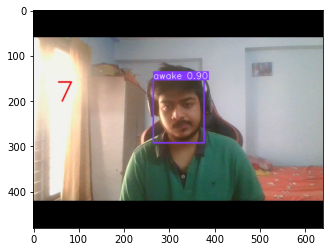

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render())) 
plt.show()

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    print(results.print())
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

image 1/1: 480x640 (no detections)
Speed: 3.9ms pre-process, 666.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 24.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 25.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 26.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 26.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 22.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 21.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 20.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 20.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.1ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 18.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.2ms pre-process, 16.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.5ms pre-process, 16.7ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 5.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 3.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.6ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 19.2ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 8.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 1 A
Speed: 1.9ms pre-process, 17.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.1ms pre-process, 17.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 0.9ms pre-process, 18.0ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 20.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.9ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.1ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.8ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 19.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 3.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.1ms pre-process, 17.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 0.9ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 20.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 16.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 19.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 16.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.1ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.4ms pre-process, 16.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 0.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 16.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.7ms pre-process, 16.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 19.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 6.3ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.1ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 0.9ms pre-process, 17.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 3.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 1.1ms pre-process, 17.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 0.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 A
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 16.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 16.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.1ms pre-process, 16.7ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 16.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 16.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 4.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 16.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 16.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 16.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.3ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 4.4ms pre-process, 17.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 3.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.5ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 19.0ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.1ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.9ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 16.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 20.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.2ms pre-process, 16.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.3ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.9ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.5ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.1ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.0ms pre-process, 17.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.8ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 16.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 19.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 2.0ms pre-process, 17.1ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 0.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.8ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 0.9ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.7ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 1 C
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 16.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.7ms pre-process, 19.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 0.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 3.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 2.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 3.0ms pre-process, 17.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.7ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.8ms pre-process, 17.0ms inference, 5.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.4ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 C
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.4ms pre-process, 16.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 3.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 D
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 2 Ds
Speed: 1.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 D
Speed: 0.9ms pre-process, 18.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.4ms pre-process, 17.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.3ms pre-process, 18.7ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.9ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.4ms pre-process, 17.4ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 19.2ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.1ms inference, 0.3ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.3ms pre-process, 17.7ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 3.0ms pre-process, 19.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.1ms pre-process, 16.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 0.9ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None


image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 182.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 21.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 20.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 19.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 17.0ms inference, 0.4ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None


image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 154.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 22.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 21.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 20.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 3.0ms pre-process, 18.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.9ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 18.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.8ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 20.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 0.9ms pre-process, 17.9ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.1ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 7.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.8ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.8ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 2.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.7ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)


None
None
None
None


Speed: 1.0ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 18.0ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.0ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.1ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
None
None


image 1/1: 480x640 (no detections)
Speed: 1.0ms pre-process, 18.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 2.7ms pre-process, 16.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 (no detections)
Speed: 1.9ms pre-process, 17.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None
None
None
